# StackOverflow Survey Analysis 2021: DS_GA 1007 Final Project
  
  <p>The StackOverflow Survey contains responses from 80,000 developers around the world. In responses developers provide responses such as which development software tools they are using, which technologies they want to learn, education background etc.</p> 

[GitHub](https://github.com/Shamoonmohd/StackOverflow-Survey-Analysis-2021)

Presented By:-

* Mohammad Shamoon(ms12737@nyu.edu)
* Ronith Murthy(rm5810@nyu.edu)
   





In [1]:
#Importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#survey analysis modular code
class survey_analysis:
  #read the dataframe
  
  def __init__(self,dataframe):
    self.df = dataframe
  
  def return_dataset(self):
    return self.df

  def initial_eda(self):
    display(self.df.head())
    print("Total number of responses recieved in survey are ", len(self.df.index)-1)
    print("\nThe StackOverlfow Survey Dataset contains: {0} columns and {1} rows".format(len(self.df.columns), len(self.df.index)-1))
    print("\nColumns Names:\n",self.df.columns)

  #outcome of this function is to print the percentage of missing values in every column
  def analyze_missing_values(self):
    total_missing = self.df.isnull().sum().sort_values(ascending=False)
    percent = ((self.df.isnull().sum()/self.df.isnull().count())*100).sort_values(ascending=False) ##use of sum and count sum ignore null values
    df_missing = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
    display(df_missing)
    return df_missing

  def data_cleaning_modelling(self):
    global data_subset
    #working with subset of data to derive insights
    cols = ['ResponseId', 'Country', 'Employment', 'EdLevel', 'YearsCode','DevType','LanguageHaveWorkedWith',
                'YearsCodePro','SOVisitFreq','MentalHealth','LanguageWantToWorkWith','CompTotal','Gender','Currency','ConvertedCompYearly']
    data_subset = self.df[cols]
    print("Subset of columns being analyzed ", cols)
    print("New subset dataframe head ")
    display(data_subset.head())

  def encode_gender(self):
    global data_subset
    print("Unique values in the Gender column are ", data_subset['Gender'].unique())
    def gender_generalization(s):
      if s['Gender'] =='Woman':
        return 'Female'
      elif s['Gender']=='Man':
        return 'Male'
      else:
        return 'Other'
    data_subset['Gender_comb']=data_subset.apply(gender_generalization,axis=1)
    print("\nGender data after encoding: \n", data_subset['Gender_comb'].unique())

    #sub-function to encode the gender into numeric values 0,1,2
    def gender_generalization_numeric(s):
      if s['Gender_comb'] =='Female':
        return 0
      elif s['Gender_comb']=='Male':
        return 1
      else:
        return 2
    data_subset['Gender_numeric']=data_subset.apply(gender_generalization_numeric,axis=1)
    print("\nEncoded gender values column \n ", data_subset['Gender_numeric'])

  def encode_edlevel(self):
    global data_subset
    print("Unique values in the EdLevel column are ", data_subset['EdLevel'].unique())
    def EdLevel_encoding(df):
      if df['EdLevel']=='Bachelor’s degree (B.A., B.S., B.Eng., etc.)':
        return 1
      elif df['EdLevel']=='Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':
        return 2
      elif df['EdLevel']=='Other doctoral degree (Ph.D., Ed.D., etc.)':
        return 3
      elif df['EdLevel']=='Some college/university study without earning a degree':
        return 4
      else:
        return 5
    data_subset['EdLevel_encoding']=data_subset.apply(EdLevel_encoding,axis=1)
    print("\nEncoded EdLevel values are: \n ", data_subset['EdLevel_encoding'].unique())

  def encode_mental_health(self):
    print("Unique values in the Mental Health column are ", data_subset['MentalHealth'].unique())
    def mental_level_encoding(df):
      if df['MentalHealth']=='None of the above':
        return 1
      elif df['MentalHealth']=='Prefer not to say':
        return 2
      else:
        return 3
    data_subset['mental_level_encoding']=data_subset.apply(mental_level_encoding,axis=1)
    print("\nEncoded Mental health values are: \n ", data_subset['mental_level_encoding'].unique())

  
  def encode_devtype_data(self):
    print("Unique values in the DevType column are \n", data_subset['DevType'].unique())
    def dev_combination(data):
      if data['DevType'] =='Developer, full-stack':
        return 'Full-stack developer'
      elif data['DevType']=='System administrator':
        return 'System administrator'
      elif data['DevType']=='Student':
        return 'Student'
      else:
        return 'Data Scientist/Analyst/Others'
    
    data_subset['DevType_combination_row']=data_subset.apply(dev_combination, axis=1)
    data_subset['DevType_combination_row'].unique()
    print("\nEncoded DevType values are: \n ", data_subset['DevType_combination_row'].unique())

  def encode_coding_years(self):
    print("\nUnique values in the YearsCode column are \n", data_subset['YearsCode'].unique())
    #perform string operations on the YearsCode column as it has many unwanted string values
    data_subset['YearsCode']=data_subset.YearsCode.str.replace("More than ","")
    data_subset['YearsCode']=data_subset.YearsCode.str.replace("Less than ","")
    data_subset['YearsCode']=data_subset.YearsCode.str.replace(" years","")
    data_subset['YearsCode']=data_subset.YearsCode.str.replace(" year","")

    #convert the string values to float
    data_subset['YearsCode']=data_subset['YearsCode'].astype(float)

    #encode the years into ranges as a separate column
    def coding_Years_range(df):
      if df['YearsCode'] <=2:
        return '0-2'
      elif df['YearsCode']<=5:
        return '3-5'
      elif df['YearsCode']<=8:
        return '6-11'
      elif df['YearsCode']<=11:
        return '6-11'
      else:
        return '>11'

    data_subset['coding_Years_range']=data_subset.apply(coding_Years_range,axis=1)
    print("\nUnique values of the encoded coding years(into ranges are): \n ", data_subset['coding_Years_range'].unique())

    #encode the years into specific unique numeric values
    def coding_Years_numeric(df):
      if df['YearsCode'] <=2.0:
        return 1
      elif df['YearsCode']<=5.0:
        return 2
      elif df['YearsCode']<=8.0:
        return 3
      elif df['YearsCode']<=11.0:
        return 3
      else:
        return 4
    
    data_subset['coding_Years_numeric']=data_subset.apply(coding_Years_numeric,axis=1)
    print("\nUnique values of the encoded coding years(into specific numeric values are): \n ", data_subset['coding_Years_numeric'].unique())
    

survey_obj = survey_analysis(pd.read_csv('/content/drive/MyDrive/DS_GA1007/stack-overflow-developer-survey-2021/survey_results_public.csv'))


In [3]:
class survey_data_plotting:
  def plot_missing_values(self,start_index, end_index,df_missing):
    tmp1 = df_missing[start_index:end_index]
    plt.figure(figsize = (16,4))
    plt.title('Percentage of missing data in each Column')
    missing_values = sns.barplot(x=tmp1.index,y=tmp1['Percent'])
    missing_values.set_xticklabels(missing_values.get_xticklabels(),rotation=90)
    plt.show()
  
  def encoded_gender_plot(self):
    data_subset['Gender_comb'].value_counts().plot(kind='barh')

  def plot_mental_health_distribution(self):
    mental_health_distribution = data_subset['MentalHealth'].value_counts()
    mental_health_distribution.plot(kind='barh', figsize=(20,10))

survey_plot_obj = survey_data_plotting()

### **Perform Initial EDA on the StackOverflow Survey Data**

In [4]:
survey_obj.initial_eda()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


Total number of responses recieved in survey are  83438

The StackOverlfow Survey Dataset contains: 48 columns and 83438 rows

Columns Names:
 Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHea

### **Data Preprocessing, finding missing values and analyzing the dataset**.

In [5]:
#print percentage of missing values for all columns
missing_vals = survey_obj.analyze_missing_values()

,Total,Percent
UK_Country,79021,94.705114
US_State,68519,82.118674
MiscTechWantToWorkWith,45418,54.432579
PlatformWantToWorkWith,41820,50.120447
ConvertedCompYearly,36595,43.858388
MiscTechHaveWorkedWith,36384,43.605508
CompTotal,36256,43.452103
WebframeWantToWorkWith,31344,37.565167
PlatformHaveWorkedWith,31304,37.517228
CompFreq,31289,37.499251


### **Plot Null values to analyze the percentage of missing data for each columns**.

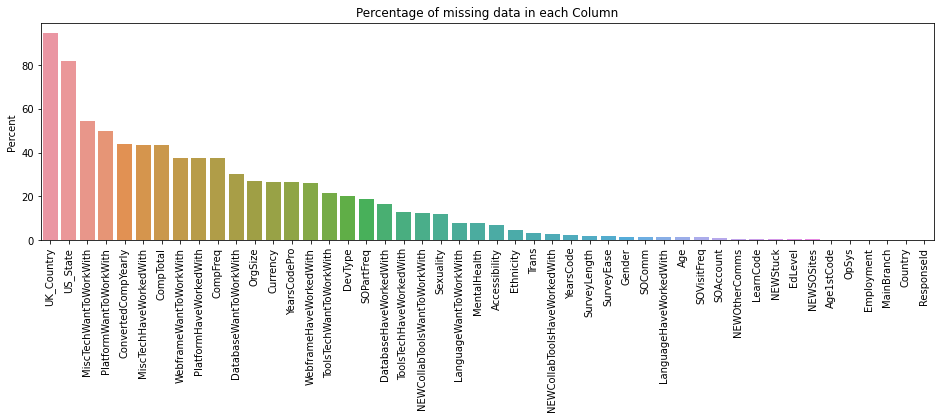

In [6]:
survey_plot_obj.plot_missing_values(0,48,missing_vals)

#### **Cleaning the data and encoding some columns**


1.   Here we will be working on a subset of columns in the original dataset
2.   Printing the head of the new subset dataframe



In [7]:
survey_obj.data_cleaning_modelling()

Subset of columns being analyzed  ['ResponseId', 'Country', 'Employment', 'EdLevel', 'YearsCode', 'DevType', 'LanguageHaveWorkedWith', 'YearsCodePro', 'SOVisitFreq', 'MentalHealth', 'LanguageWantToWorkWith', 'CompTotal', 'Gender', 'Currency', 'ConvertedCompYearly']
New subset dataframe head 


,ResponseId,Country,Employment,EdLevel,YearsCode,DevType,LanguageHaveWorkedWith,YearsCodePro,SOVisitFreq,MentalHealth,LanguageWantToWorkWith,CompTotal,Gender,Currency,ConvertedCompYearly
0,1,Slovakia,"Independent contractor, freelancer, or self-em...","Secondary school (e.g. American high school, G...",NaN,"Developer, mobile",C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,NaN,Multiple times per day,None of the above,Swift,4800.0,Man,EUR European Euro,62268.0
1,2,Netherlands,"Student, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,NaN,JavaScript;Python,NaN,Daily or almost daily,None of the above,NaN,NaN,Man,NaN,NaN
2,3,Russian Federation,"Student, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,Assembly;C;Python;R;Rust,NaN,Multiple times per day,None of the above,Julia;Python;Rust,NaN,Man,NaN,NaN
3,4,Austria,Employed full-time,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,"Developer, front-end",JavaScript;TypeScript,NaN,Daily or almost daily,NaN,JavaScript;TypeScript,NaN,Man,EUR European Euro,NaN
4,5,United Kingdom of Great Britain and Northern I...,"Independent contractor, freelancer, or self-em...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Developer, desktop or enterprise applications;...",Bash/Shell;HTML/CSS;Python;SQL,10,Daily or almost daily,NaN,Bash/Shell;HTML/CSS;Python;SQL,NaN,Man,GBP\tPound sterling,NaN


#### **Encode the 'Gender' column in the dataset and plot the encoded data**

In [8]:
survey_obj.encode_gender()

Unique values in the Gender column are  ['Man' 'Prefer not to say' 'Woman'
 'Non-binary, genderqueer, or gender non-conforming'
 'Man;Or, in your own words:' nan
 'Woman;Non-binary, genderqueer, or gender non-conforming'
 'Man;Non-binary, genderqueer, or gender non-conforming'
 'Or, in your own words:' 'Man;Woman'
 'Man;Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:'
 'Non-binary, genderqueer, or gender non-conforming;Or, in your own words:'
 'Woman;Or, in your own words:'
 'Man;Woman;Non-binary, genderqueer, or gender non-conforming'
 'Man;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:'
 'Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:'
 'Man;Woman;Or, in your own words:']

Gender data after encoding: 
 ['Male' 'Other' 'Female']

Encoded gender values column 
  0        1
1        1
2        1
3        1
4        1
        ..
83434    1
83435    1
83436    1
83437    1
83438    1
Name: Gender_nume

**Due to a lot of different kinds of entries, the values have to be numerically encoded for ease of handling, analyzing data**

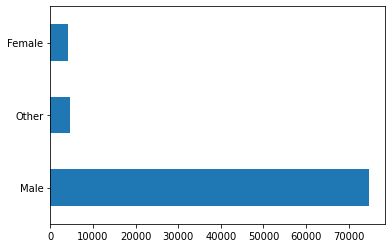

In [9]:
survey_plot_obj.encoded_gender_plot()

**The numeric equivalent for the encoded gender data is 0,1,2**

In [10]:
survey_obj.encode_edlevel()

Unique values in the EdLevel column are  ['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Other doctoral degree (Ph.D., Ed.D., etc.)'
 'Some college/university study without earning a degree' 'Something else'
 'Professional degree (JD, MD, etc.)' 'Primary/elementary school'
 'Associate degree (A.A., A.S., etc.)' nan]

Encoded EdLevel values are: 
  [5 1 2 3 4]


**Here we have encoded the various eduation levels into numbers 1,2,3,4,5**

#### **Plotting Unique Categorical data on Mental health Column**

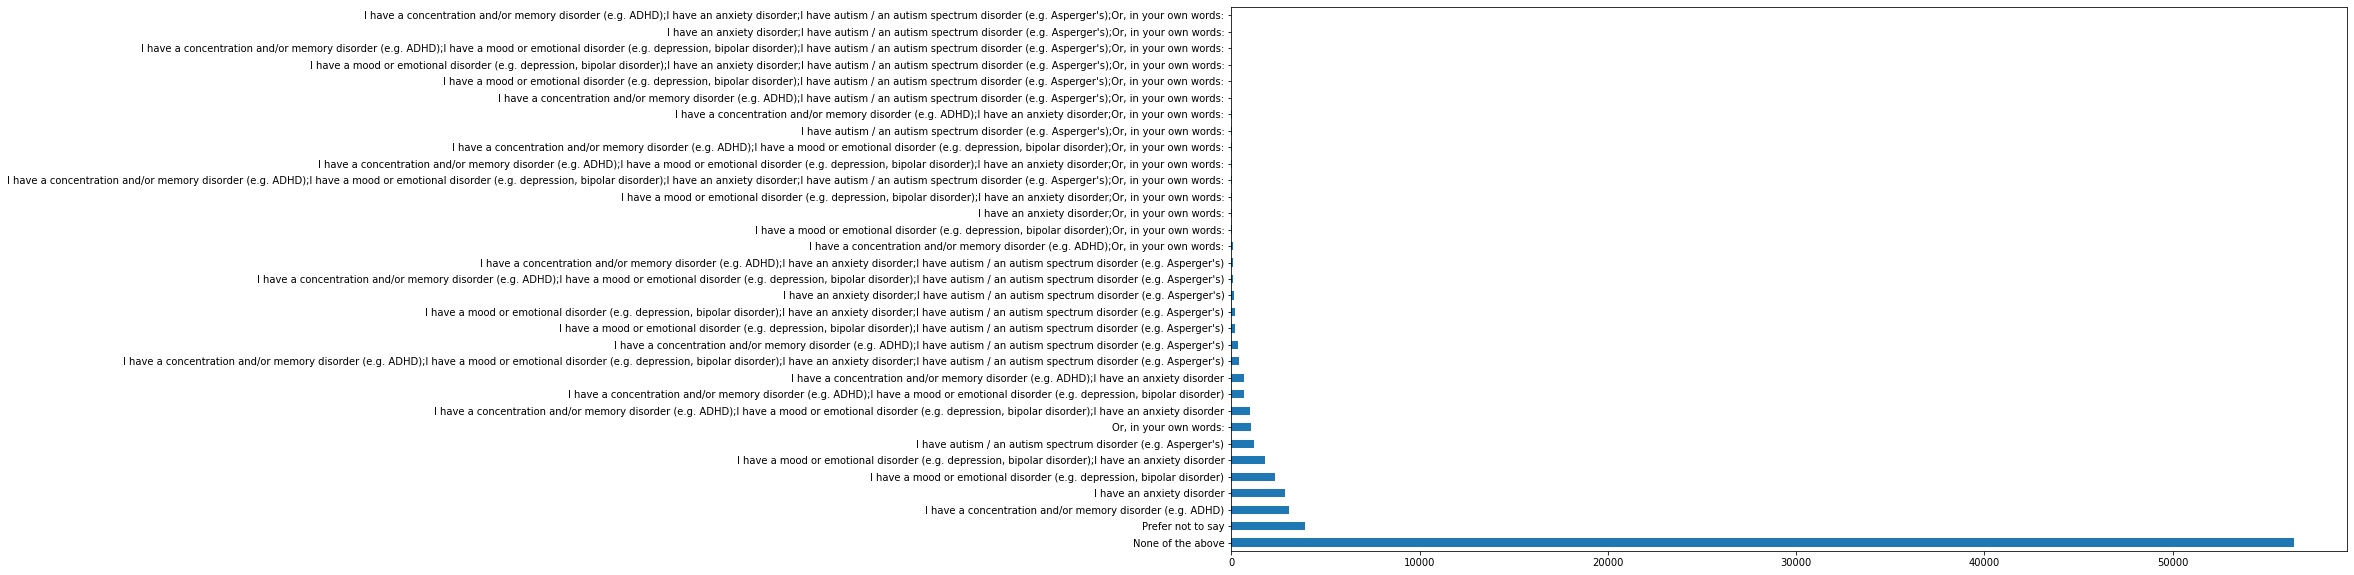

In [11]:
survey_plot_obj.plot_mental_health_distribution()

Mental health values have to be encoded, for any inferences to be made

In [12]:
survey_obj.encode_mental_health()

Unique values in the Mental Health column are  ['None of the above' nan
 'I have a concentration and/or memory disorder (e.g. ADHD)'
 'Prefer not to say'
 'I have a mood or emotional disorder (e.g. depression, bipolar disorder);I have an anxiety disorder'
 "I have a concentration and/or memory disorder (e.g. ADHD);I have autism / an autism spectrum disorder (e.g. Asperger's);Or, in your own words:"
 'I have an anxiety disorder'
 'I have a concentration and/or memory disorder (e.g. ADHD);I have a mood or emotional disorder (e.g. depression, bipolar disorder);I have an anxiety disorder'
 "I have autism / an autism spectrum disorder (e.g. Asperger's)"
 "I have a mood or emotional disorder (e.g. depression, bipolar disorder);I have an anxiety disorder;I have autism / an autism spectrum disorder (e.g. Asperger's)"
 'I have a mood or emotional disorder (e.g. depression, bipolar disorder)'
 "I have a concentration and/or memory disorder (e.g. ADHD);I have autism / an autism spectrum disorder 

**Ultimately, the mental health is classified into three categories:**


1.   No mental issues
2.   Prefer not to say
3.   Have mental issues


In [13]:
survey_obj.encode_devtype_data()

Unique values in the DevType column are 
 ['Developer, mobile' nan 'Developer, front-end' ...
 'Developer, mobile;Developer, front-end;Developer, full-stack;Developer, back-end;Database administrator;Developer, embedded applications or devices;System administrator;Educator'
 'Developer, front-end;Developer, desktop or enterprise applications;Developer, full-stack;Developer, back-end;Developer, QA or test;Developer, embedded applications or devices;Engineering manager;Educator'
 'Developer, mobile;Developer, desktop or enterprise applications;Data scientist or machine learning specialist;Developer, back-end;Engineering manager']

Encoded DevType values are: 
  ['Data Scientist/Analyst/Others' 'Full-stack developer' 'Student'
 'System administrator']


From the list of various types of developers, we have now encoded the developers into 4 categories, as visible above.

**Let us shift our attention to the "YearsCode" column**

In [14]:
# string operations have to be performed on the Yearscode column to make it fully numeric
survey_obj.encode_coding_years()


Unique values in the YearsCode column are 
 [nan '7' '17' '3' '4' '6' '16' '12' '15' '10' '40' '9' '26' '14' '39' '20'
 '8' '19' '5' 'Less than 1 year' '22' '2' '1' '34' '21' '13' '25' '24'
 '30' '31' '18' '38' 'More than 50 years' '27' '41' '42' '35' '23' '28'
 '11' '37' '44' '43' '36' '33' '45' '29' '50' '46' '32' '47' '49' '48']

Unique values of the encoded coding years(into ranges are): 
  ['>11' '6-11' '3-5' '0-2']

Unique values of the encoded coding years(into specific numeric values are): 
  [4 3 2 1]


### **Analyzing the dataset based on the country information**

In [15]:
class country_based_data_summary:
  # This class contains functions that help us summarise the dataset based on the countries in the dataset
  def __init__(self,data_subset):
    self.df = data_subset

  def summary_1(self):
    # Summarize the dataset based on 'Country','Employment','EdLevel','YearsCode','coding_Years_range','ConvertedCompYearly' and
    # aggregate all the similar responses
    column_list=['Country','Employment','EdLevel','YearsCode','coding_Years_range','ConvertedCompYearly']
    df_summary_1= self.df.groupby(by=column_list,as_index=False).agg({'ResponseId':'count'})
    display(df_summary_1)
  
  def educationlevel_summary(self):
    column_list=['Country','EdLevel']
    df_summary_2=self.df.groupby(by=column_list,as_index=False).agg({'ResponseId':'count'})
    display(df_summary_2)
    return(df_summary_2)

In [16]:
country_obj = country_based_data_summary(data_subset)

#### **In summary 1, we are trying to  aggregate all the similar responses at the country level, based on**

1.   Employment
2.   EdLevel
3.   YearsCode
4.   coding_Years_range
5.   ConvertedCompYearly

In [17]:
country_obj.summary_1()

,Country,Employment,EdLevel,YearsCode,coding_Years_range,ConvertedCompYearly,ResponseId
0,Afghanistan,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3.0,3-5,3108.0,1
1,Afghanistan,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7.0,6-11,4668.0,1
2,Afghanistan,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7.0,6-11,5448.0,1
3,Afghanistan,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7.0,6-11,15132.0,1
4,Afghanistan,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8.0,6-11,4200.0,1
...,...,...,...,...,...,...,...
39438,Zimbabwe,Employed part-time,"Associate degree (A.A., A.S., etc.)",12.0,>11,36000.0,1
39439,Zimbabwe,Employed part-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6.0,6-11,6000.0,1
39440,Zimbabwe,Employed part-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8.0,6-11,4000.0,1
39441,Zimbabwe,"Independent contractor, freelancer, or self-em...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,3-5,120.0,1


#### **In summary 2, we are trying to  aggregate all the similar responses at the country level, based on**
  1.   EdLevel



In [18]:
summary_2 = country_obj.educationlevel_summary()

,Country,EdLevel,ResponseId
0,Afghanistan,"Associate degree (A.A., A.S., etc.)",1
1,Afghanistan,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",21
2,Afghanistan,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5
3,Afghanistan,Primary/elementary school,8
4,Afghanistan,"Professional degree (JD, MD, etc.)",4
...,...,...,...
1158,Zimbabwe,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",1
1159,Zimbabwe,Primary/elementary school,1
1160,Zimbabwe,"Secondary school (e.g. American high school, G...",5
1161,Zimbabwe,Some college/university study without earning ...,7


#### **In summary 3 From this we can infer the total number of people at specific education levels, from different countries**

In [19]:
df_summary_3=(summary_2.sort_values(by=['ResponseId'],ascending=False)).head(100)
df_summary_3

,Country,EdLevel,ResponseId
1109,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7315
438,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6308
1110,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2578
1115,United States of America,Some college/university study without earning ...,2108
1094,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1816
...,...,...,...
618,Malaysia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",181
342,Finland,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",177
215,China,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",175
536,Kenya,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",171


About 7315 responses from the USA were at the Bachelor’s degree education level

#### **Analyzing the total responses count from every country in the dataset**

In [20]:
column_list=['Country']
df_country = data_subset.groupby(by=column_list,as_index=False).agg({'ResponseId':'count'})
df_country

,Country,ResponseId
0,Afghanistan,65
1,Albania,73
2,Algeria,46
3,Andorra,12
4,Angola,27
...,...,...
176,"Venezuela, Bolivarian Republic of...",104
177,Viet Nam,386
178,Yemen,20
179,Zambia,22


In [21]:
# Sorting country to find maximum number of responses based on country
df_count_2=(df_country.sort_values(by=['ResponseId'],ascending=False)).head(100)
df_count_2

,Country,ResponseId
173,United States of America,15288
69,India,10511
58,Germany,5625
171,United Kingdom of Great Britain and Northern I...,4475
29,Canada,3012
...,...,...
93,Luxembourg,51
19,Bolivia,48
125,Paraguay,47
2,Algeria,46


We can see from the above that USA leads in number of responses, followed by India and so on ....

### **Exploratory Data Analysis based on Country**

#### Highest Number of Developer response based on Country Indicating Highest number of developers oportunities:-

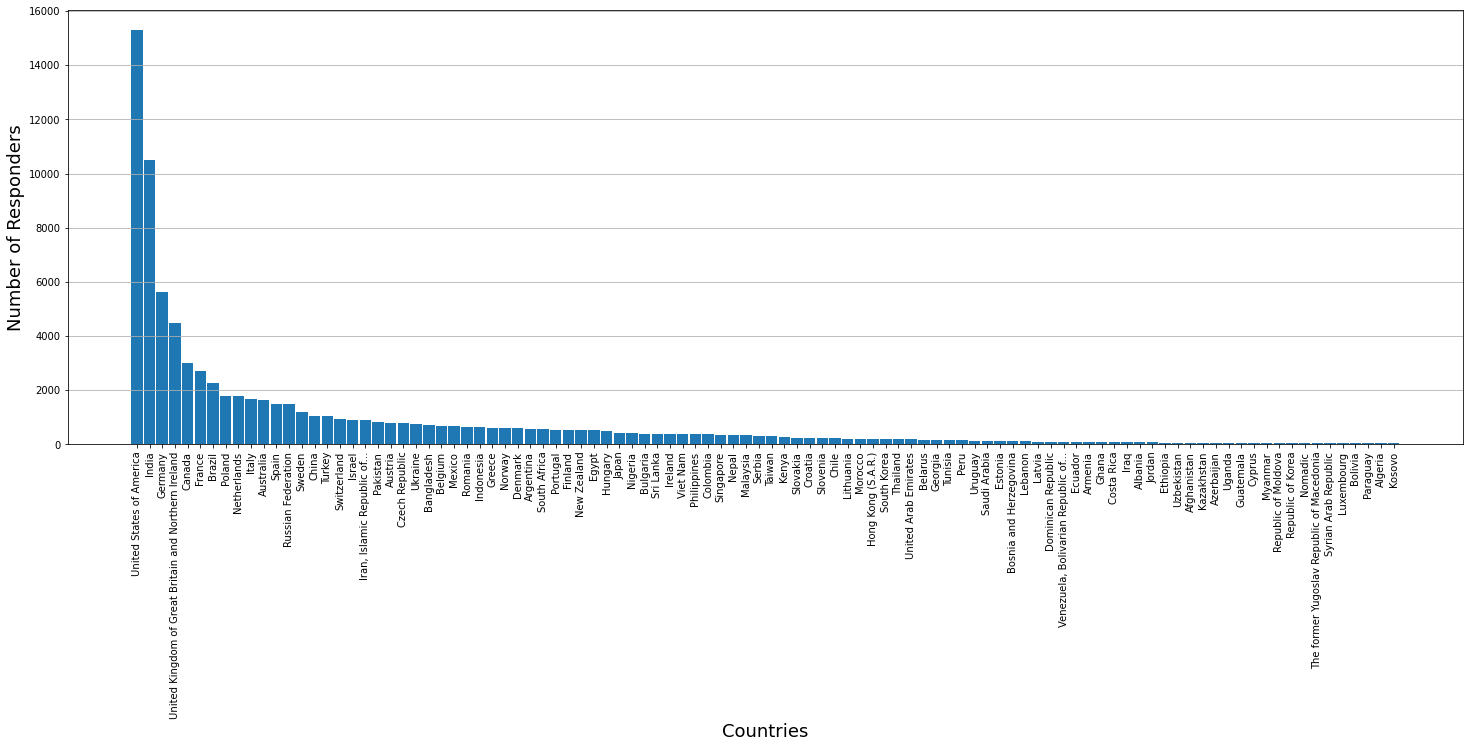

In [22]:
plt.figure(figsize=(25, 8))
plt.bar(df_count_2['Country'], df_count_2['ResponseId'],width=0.9,align='center')
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Countries', fontsize=18)
plt.ylabel('Number of Responders', fontsize=18)
plt.grid(axis='y')
plt.show()

#### Conclusion:-
As we can see after USA, India, germany and UK has highest number of developers.

#### **Countries with responders with highest salaries in each country in survey**

In [23]:
column_list=['Country']
dataset = survey_obj.return_dataset()
# dataset.head()
df_country_salary=dataset.groupby(by=column_list,as_index=False).agg({'ResponseId':'count','ConvertedCompYearly':'mean'})
df_country_salary_subset =  df_country_salary.sort_values(by='ConvertedCompYearly', ascending=False).head(20)
df_country_salary_subset.dropna()
df_country_salary_subset

,Country,ResponseId,ConvertedCompYearly
0,Afghanistan,65,2.794748e+06
139,San Marino,2,5.967000e+05
173,United States of America,15288,2.629939e+05
118,North Korea,6,2.400000e+05
117,Nomadic,54,2.154913e+05
27,Cambodia,35,2.002134e+05
73,Ireland,386,1.927105e+05
15,Belgium,697,1.807789e+05
7,Australia,1646,1.604689e+05
156,Switzerland,922,1.580258e+05


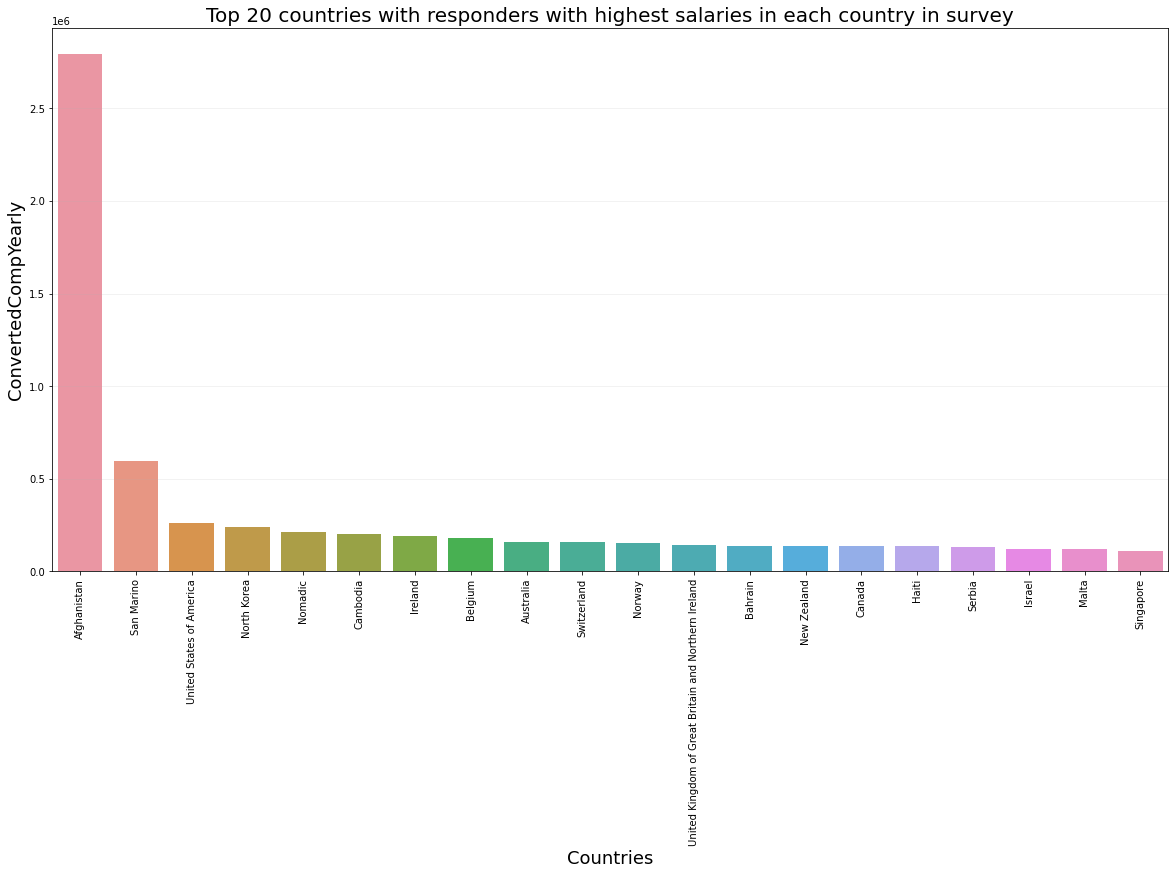

In [24]:
fig, ax = plt.subplots(figsize = (20, 10))
s = sns.barplot(x='Country', y='ConvertedCompYearly', data=df_country_salary_subset, dodge=False)
plt.xticks(rotation=90)
plt.xlabel("Countries", fontsize=18)
plt.ylabel("ConvertedCompYearly", fontsize=18)
plt.title("Top 20 countries with responders with highest salaries in each country in survey", fontsize=20)
plt.grid(axis='y',alpha=0.2)
plt.show()

#### **Response based on Country and degree**

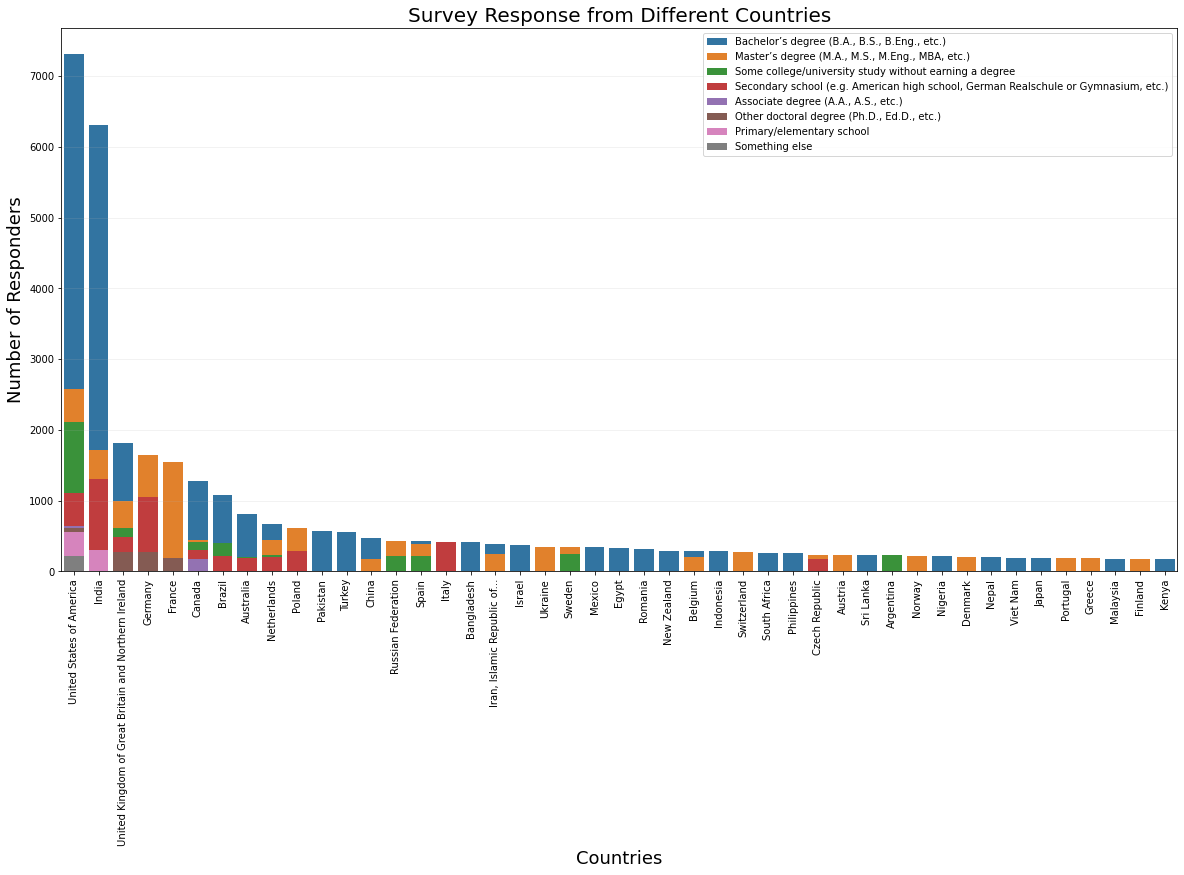

In [25]:
fig, ax = plt.subplots(figsize = (20, 10))
s = sns.barplot(x='Country', y='ResponseId', data=df_summary_3, hue='EdLevel', dodge=False)
plt.xticks(rotation=90)
plt.xlabel("Countries", fontsize=18)
plt.ylabel("Number of Responders", fontsize=18)
plt.title("Survey Response from Different Countries", fontsize=20)
plt.legend(loc ="upper right")
plt.grid(axis='y',alpha=0.2)
plt.show()

In [26]:
column_list=['Country']
df_country_salary=data_subset.groupby(by=column_list,as_index=False).agg({'ResponseId':'count','ConvertedCompYearly':'mean'})
df_country_salary

,Country,ResponseId,ConvertedCompYearly
0,Afghanistan,65,2.794748e+06
1,Albania,73,4.499814e+04
2,Algeria,46,1.446114e+04
3,Andorra,12,8.928200e+04
4,Angola,27,2.155680e+04
...,...,...,...
176,"Venezuela, Bolivarian Republic of...",104,2.246505e+04
177,Viet Nam,386,1.995289e+04
178,Yemen,20,5.628667e+03
179,Zambia,22,1.991491e+04


In [27]:
df_country_salary=df_country_salary.dropna()

In [28]:
df_country_salary

,Country,ResponseId,ConvertedCompYearly
0,Afghanistan,65,2.794748e+06
1,Albania,73,4.499814e+04
2,Algeria,46,1.446114e+04
3,Andorra,12,8.928200e+04
4,Angola,27,2.155680e+04
...,...,...,...
176,"Venezuela, Bolivarian Republic of...",104,2.246505e+04
177,Viet Nam,386,1.995289e+04
178,Yemen,20,5.628667e+03
179,Zambia,22,1.991491e+04


### **Correlation between Variables**

In [29]:
column_list=['Gender_numeric','coding_Years_numeric','ConvertedCompYearly','EdLevel_encoding']
df_corr_1=data_subset[column_list]
df_corr_1

,Gender_numeric,coding_Years_numeric,ConvertedCompYearly,EdLevel_encoding
0,1,4,62268.0,5
1,1,3,NaN,1
2,1,4,NaN,1
3,1,4,NaN,2
4,1,4,NaN,2
...,...,...,...,...
83434,1,3,160500.0,1
83435,1,2,3960.0,1
83436,1,3,90000.0,5
83437,1,2,816816.0,1


In [30]:
corrMatrix = df_corr_1.corr().reset_index().melt('index')
corrMatrix

,index,variable,value
0,Gender_numeric,Gender_numeric,1.000000
1,coding_Years_numeric,Gender_numeric,0.045964
2,ConvertedCompYearly,Gender_numeric,0.025995
3,EdLevel_encoding,Gender_numeric,0.058975
4,Gender_numeric,coding_Years_numeric,0.045964
5,coding_Years_numeric,coding_Years_numeric,1.000000
6,ConvertedCompYearly,coding_Years_numeric,0.044262
7,EdLevel_encoding,coding_Years_numeric,-0.230061
8,Gender_numeric,ConvertedCompYearly,0.025995
9,coding_Years_numeric,ConvertedCompYearly,0.044262


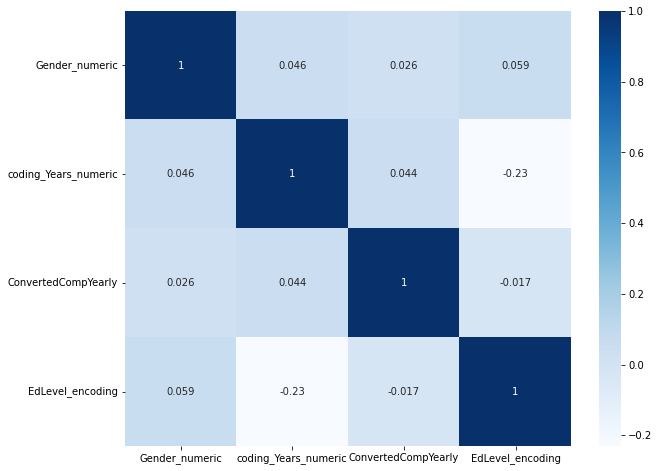

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_1.corr(),cmap="Blues",annot=True)

##### **The correlation matrix depicts that there is no gender inequality in the Tech role**


#### 1. The matrix show correlation between experience and salary.
#### 2. As people with more experience has higher Salaries

##### Hypothesis: There is a directly proportional relation between experience and higher salaries.
Plotting the relation between experience and higher salaries

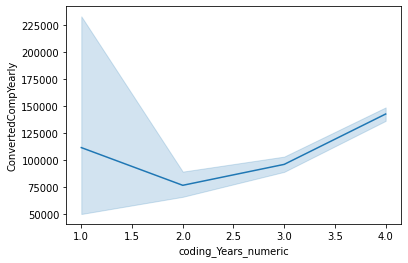

In [32]:
sns.lineplot(data=df_corr_1, x="coding_Years_numeric", y="ConvertedCompYearly")

##### Conclusion: Yes, we can say that experience and salary are directly correlated but in some case you can say that people with 1 year experience able to get higher salaries as comparison to developers  with experiences range from 1.5 to 2.5 years of experience.

##### Another Hypothesis: To investigate why less experience candidate back higher salaries than developer for with more experience.

Assuming that developer which have less experience have higher education qualification than developer with more experience.

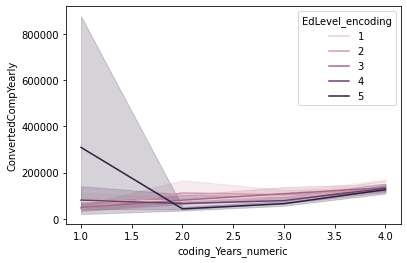

In [33]:
sns.lineplot(data=df_corr_1, x="coding_Years_numeric", y="ConvertedCompYearly", hue="EdLevel_encoding")

In [34]:
column_list=['ResponseId','ConvertedCompYearly','Gender_numeric','coding_Years_numeric','EdLevel_encoding','mental_level_encoding']
df_corr_2=data_subset[column_list]
df_corr_2

,ResponseId,ConvertedCompYearly,Gender_numeric,coding_Years_numeric,EdLevel_encoding,mental_level_encoding
0,1,62268.0,1,4,5,1
1,2,NaN,1,3,1,1
2,3,NaN,1,4,1,1
3,4,NaN,1,4,2,3
4,5,NaN,1,4,2,3
...,...,...,...,...,...,...
83434,83435,160500.0,1,3,1,3
83435,83436,3960.0,1,2,1,1
83436,83437,90000.0,1,3,5,1
83437,83438,816816.0,1,2,1,3


In [35]:
df_corr_2=df_corr_2.dropna()

In [36]:
df_corr_2.corr()

,ResponseId,ConvertedCompYearly,Gender_numeric,coding_Years_numeric,EdLevel_encoding,mental_level_encoding
ResponseId,1.000000,0.004742,-0.032906,-0.043589,-0.005323,0.014192
ConvertedCompYearly,0.004742,1.000000,0.025995,0.044262,-0.016946,0.023137
Gender_numeric,-0.032906,0.025995,1.000000,0.064506,0.035944,0.037597
coding_Years_numeric,-0.043589,0.044262,0.064506,1.000000,0.010285,-0.015223
EdLevel_encoding,-0.005323,-0.016946,0.035944,0.010285,1.000000,0.064209
mental_level_encoding,0.014192,0.023137,0.037597,-0.015223,0.064209,1.000000


In [37]:
corrMatrix_mental = df_corr_2.corr().reset_index().melt('index')
corrMatrix_mental

,index,variable,value
0,ResponseId,ResponseId,1.000000
1,ConvertedCompYearly,ResponseId,0.004742
2,Gender_numeric,ResponseId,-0.032906
3,coding_Years_numeric,ResponseId,-0.043589
4,EdLevel_encoding,ResponseId,-0.005323
5,mental_level_encoding,ResponseId,0.014192
6,ResponseId,ConvertedCompYearly,0.004742
7,ConvertedCompYearly,ConvertedCompYearly,1.000000
8,Gender_numeric,ConvertedCompYearly,0.025995
9,coding_Years_numeric,ConvertedCompYearly,0.044262


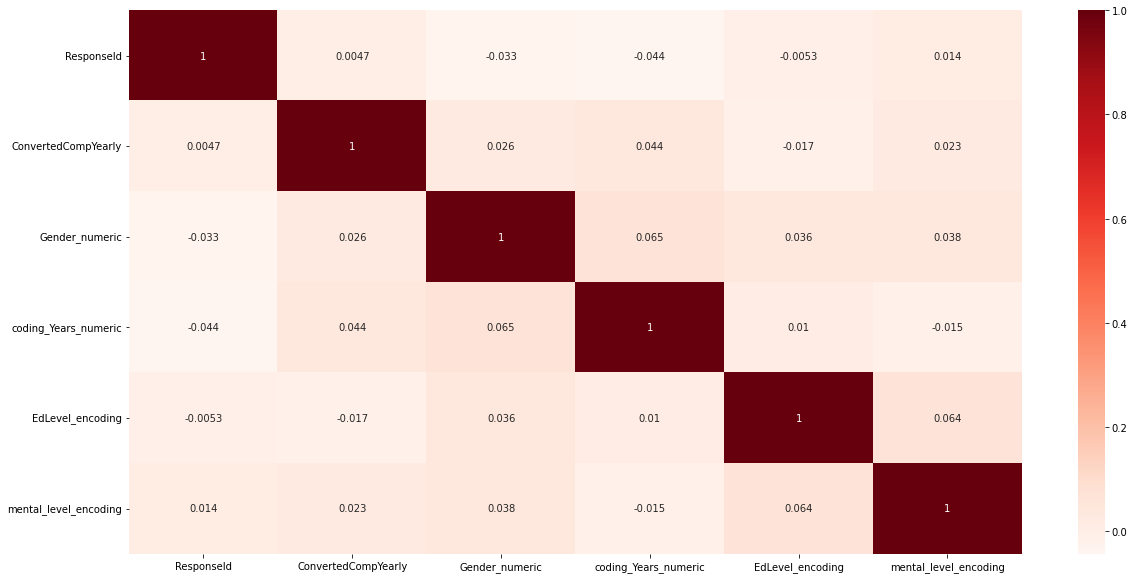

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df_corr_2.corr(),cmap="Reds",annot=True)

##### Hypothesis: As we can see the mental health seem to have some relation between education level and gender

##### Plotting the graph between education level and mental health

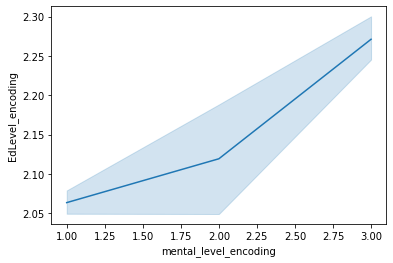

In [39]:
sns.lineplot(data=df_corr_2, x="mental_level_encoding", y="EdLevel_encoding")

##### Plotting the graph between Gender and mental health

In [40]:
column_list=['mental_level_encoding','Gender_comb']
df_mental_1=data_subset.groupby(by=column_list,as_index=False).agg({'ResponseId':'count'})
df_mental_1

,mental_level_encoding,Gender_comb,ResponseId
0,1,Female,2338
1,1,Male,52902
2,1,Other,1219
3,2,Female,214
4,2,Male,2921
5,2,Other,797
6,3,Female,1568
7,3,Male,18994
8,3,Other,2486


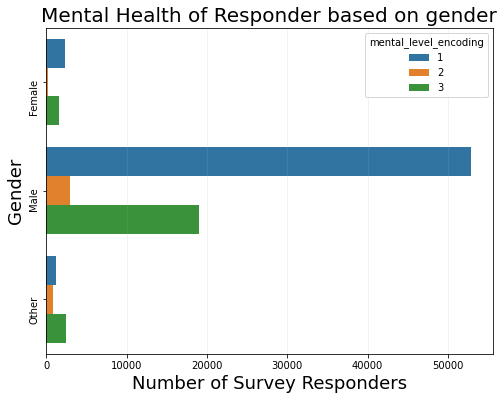

In [41]:
fig, ax = plt.subplots(figsize = (8, 6))
s = sns.barplot(x='ResponseId', y='Gender_comb', data=df_mental_1, hue='mental_level_encoding', orient='h')
plt.yticks(rotation=90)
plt.xlabel("Number of Survey Responders", fontsize=18)
plt.ylabel("Gender", fontsize=18)
plt.title("Mental Health of Responder based on gender", fontsize=20)
plt.grid(axis='x',alpha=0.2)
plt.show()

### **Salary Analysis across Experience and Gender**

In [42]:
column_list=['ResponseId','YearsCode','ConvertedCompYearly','Gender','Gender_comb','coding_Years_range']
df_sampling=data_subset[column_list]
df_sampling

,ResponseId,YearsCode,ConvertedCompYearly,Gender,Gender_comb,coding_Years_range
0,1,NaN,62268.0,Man,Male,>11
1,2,7.0,NaN,Man,Male,6-11
2,3,NaN,NaN,Man,Male,>11
3,4,NaN,NaN,Man,Male,>11
4,5,17.0,NaN,Man,Male,>11
...,...,...,...,...,...,...
83434,83435,6.0,160500.0,Man,Male,6-11
83435,83436,4.0,3960.0,Man,Male,3-5
83436,83437,10.0,90000.0,Man,Male,6-11
83437,83438,5.0,816816.0,Man,Male,3-5


In [43]:
df_sampling=df_sampling.dropna()
df_sampling

,ResponseId,YearsCode,ConvertedCompYearly,Gender,Gender_comb,coding_Years_range
9,10,7.0,51552.0,Man,Male,6-11
11,12,12.0,46482.0,Man,Male,>11
12,13,15.0,77290.0,Man,Male,>11
16,17,6.0,17748.0,Man,Male,6-11
17,18,9.0,46135.0,Man,Male,6-11
...,...,...,...,...,...,...
83434,83435,6.0,160500.0,Man,Male,6-11
83435,83436,4.0,3960.0,Man,Male,3-5
83436,83437,10.0,90000.0,Man,Male,6-11
83437,83438,5.0,816816.0,Man,Male,3-5


In [44]:
column_list=['coding_Years_range','Gender_comb']
df_sampling_1=data_subset.groupby(by=column_list,as_index=False).agg({'ResponseId':'count'})
df_sampling_1

,coding_Years_range,Gender_comb,ResponseId
0,0-2,Female,574
1,0-2,Male,5490
2,0-2,Other,462
3,3-5,Female,962
4,3-5,Male,13928
5,3-5,Other,798
6,6-11,Female,1473
7,6-11,Male,23850
8,6-11,Other,1316
9,>11,Female,1111


In [45]:
df_sampling_1.ResponseId.unique()

array([  574,  5490,   462,   962, 13928,   798,  1473, 23850,  1316,
        1111, 31549,  1926])

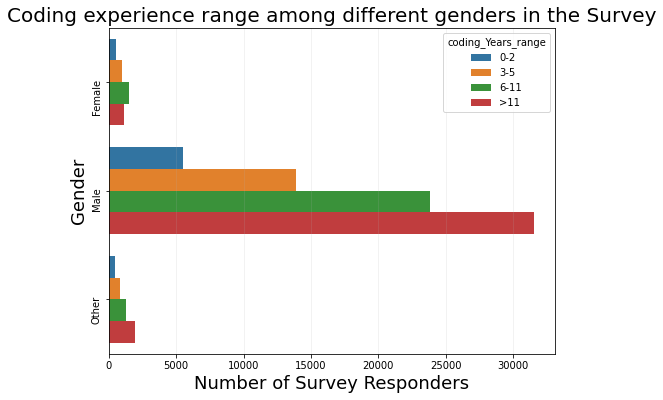

In [46]:
fig, ax = plt.subplots(figsize = (8, 6))
s = sns.barplot(x='ResponseId', y='Gender_comb', data=df_sampling_1, hue='coding_Years_range', orient='h')
plt.yticks(rotation=90)
plt.xlabel("Number of Survey Responders", fontsize=18)
plt.ylabel("Gender", fontsize=18)
plt.title("Coding experience range among different genders in the Survey", fontsize=20)
plt.grid(axis='x',alpha=0.2)
plt.show()

In [47]:
column_list=['Gender_comb']
df_salary_agg=data_subset.groupby(by=column_list,as_index=False).agg({'ResponseId':'count','ConvertedCompYearly':'mean'})
df_salary_agg

,Gender_comb,ResponseId,ConvertedCompYearly
0,Female,4120,105387.108475
1,Male,74817,115583.592255
2,Other,4502,218598.054108


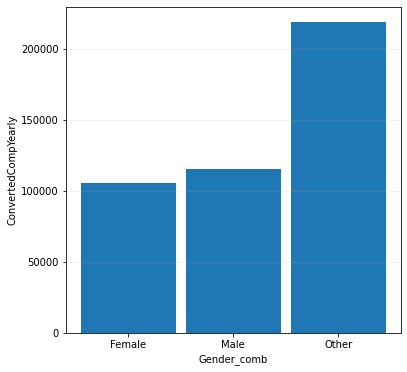

In [48]:
plt.figure(figsize=(6, 6))
plt.bar(df_salary_agg['Gender_comb'],df_salary_agg['ConvertedCompYearly'],width=0.9,align='center')
plt.xticks(fontsize=10)
plt.xlabel('Gender_comb')
plt.ylabel('ConvertedCompYearly')
plt.grid(axis='y', alpha=0.2)
plt.show()

In [49]:
df_sampling_outlier=df_sampling[df_sampling['ConvertedCompYearly']<=500000]
df_sampling_outlier

,ResponseId,YearsCode,ConvertedCompYearly,Gender,Gender_comb,coding_Years_range
9,10,7.0,51552.0,Man,Male,6-11
11,12,12.0,46482.0,Man,Male,>11
12,13,15.0,77290.0,Man,Male,>11
16,17,6.0,17748.0,Man,Male,6-11
17,18,9.0,46135.0,Man,Male,6-11
...,...,...,...,...,...,...
83433,83434,15.0,18326.0,Man,Male,>11
83434,83435,6.0,160500.0,Man,Male,6-11
83435,83436,4.0,3960.0,Man,Male,3-5
83436,83437,10.0,90000.0,Man,Male,6-11


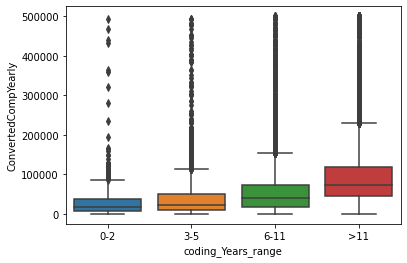

In [50]:
sns.boxplot( y=df_sampling_outlier["ConvertedCompYearly"], x=df_sampling_outlier["coding_Years_range"],
                 order=["0-2","3-5","6-11",">11"]) 
plt.show()

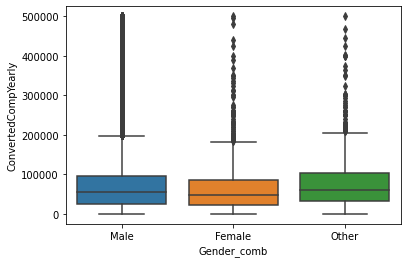

In [51]:
sns.boxplot( y=df_sampling_outlier["ConvertedCompYearly"], x=df_sampling_outlier["Gender_comb"],order=["Male","Female","Other"] )
plt.show()

### **Top Trending Technologies which included Programming languages, Database, WebFrame work, Platform, Miscellaneous and Tools in 2021** 

#### Most Trending coding language available in 2021

In [52]:
column_list=['ResponseId','LanguageHaveWorkedWith']
df_languages_1=data_subset[column_list].dropna()
df_languages_1.head()

,ResponseId,LanguageHaveWorkedWith
0,1,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift
1,2,JavaScript;Python
2,3,Assembly;C;Python;R;Rust
3,4,JavaScript;TypeScript
4,5,Bash/Shell;HTML/CSS;Python;SQL


In [53]:
def language_count(df,keyword):
    return 1 if keyword in df['LanguageHaveWorkedWith'] else 0

In [54]:
def creating_new_df_col(df, column_name_list, func_name):
  for key in column_name_list:
    df[key] = df.apply(func_name,keyword=key,axis=1)


column_name = ['CSS','Java','SQL','HTML','Bash/Shell','C++','R','C#','PHP','Python']
func_name = language_count
creating_new_df_col(df_languages_1, column_name, func_name)
df_languages_1

,ResponseId,LanguageHaveWorkedWith,CSS,Java,SQL,HTML,Bash/Shell,C++,R,C#,PHP,Python
0,1,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,1,1,0,1,0,1,0,0,1,0
1,2,JavaScript;Python,0,1,0,0,0,0,0,0,0,1
2,3,Assembly;C;Python;R;Rust,0,0,0,0,0,0,1,0,0,1
3,4,JavaScript;TypeScript,0,1,0,0,0,0,0,0,0,0
4,5,Bash/Shell;HTML/CSS;Python;SQL,1,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
83433,83434,Java;JavaScript;Kotlin;Objective-C;TypeScript,0,1,0,0,0,0,0,0,0,0
83434,83435,Clojure;Kotlin;SQL,0,0,1,0,0,0,0,0,0,0
83436,83437,Groovy;Java;Python,0,1,0,0,0,0,0,0,0,1
83437,83438,Bash/Shell;JavaScript;Node.js;Python,0,1,0,0,1,0,0,0,0,1


In [55]:
df_language_collated=df_languages_1[['CSS','Java','Python','SQL','HTML','Bash/Shell','C++','R','C#','PHP']].sum()
df_language_collated.columns=['Language','NumberofResponders']
df_language_collated

CSS           46259
Java          62371
Python        39792
SQL           38835
HTML          46259
Bash/Shell    22385
C++           20057
R             14260
C#            22984
PHP           18130
dtype: int64

In [56]:
df_languages=pd.DataFrame(df_language_collated)
df_languages.reset_index(inplace=True)
df_languages.columns=['Language','NumberofResponders']
df_languages

,Language,NumberofResponders
0,CSS,46259
1,Java,62371
2,Python,39792
3,SQL,38835
4,HTML,46259
5,Bash/Shell,22385
6,C++,20057
7,R,14260
8,C#,22984
9,PHP,18130


In [57]:
df_languages=df_languages.sort_values(by='NumberofResponders',ascending=False)
df_languages

,Language,NumberofResponders
1,Java,62371
0,CSS,46259
4,HTML,46259
2,Python,39792
3,SQL,38835
8,C#,22984
5,Bash/Shell,22385
6,C++,20057
9,PHP,18130
7,R,14260


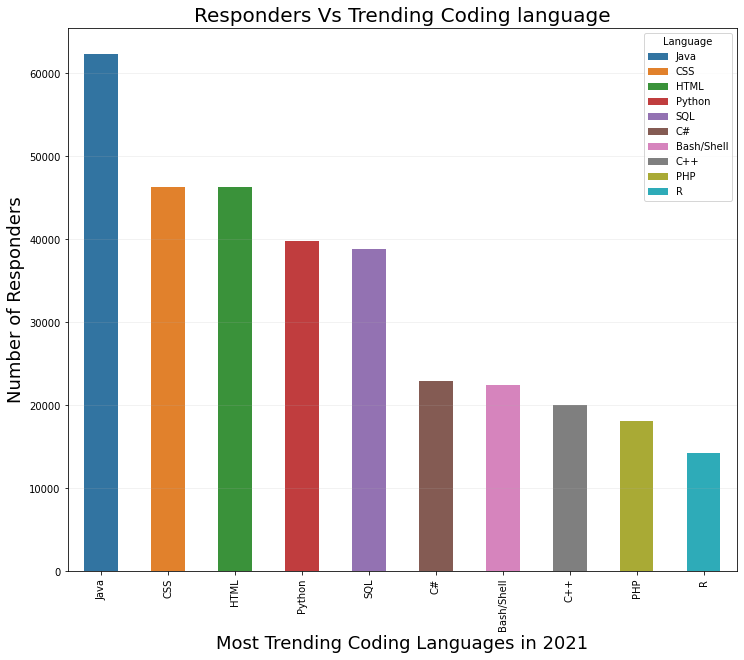

In [58]:
def plot_desired_tech(dataframe, x_axis, y_axis, category, x_label_arg, y_label_arg, title, width, height):
  fig, ax = plt.subplots(figsize = (width, height))
  ax = sns.barplot(data=dataframe, ax=ax, x=x_axis, y=y_axis, hue=category, dodge = False)
  def change_bar_width(axis, new_bar_width) :
      for p in axis.patches :
          current_bar_width = p.get_width()
          diff = current_bar_width - new_bar_width
          # change bar width
          p.set_width(new_bar_width)
          # recenter bar
          p.set_x(p.get_x() + diff * .5)

  change_bar_width(ax, .50)
  plt.xticks(rotation=90)
  plt.xlabel(x_label_arg, fontsize=18)
  plt.ylabel(y_label_arg, fontsize=18)
  plt.title(title, fontsize=20)
  plt.grid(axis='y',alpha=0.2)
  plt.show()

dataframe_plot = df_languages
plot_xaxis = "Language"
plot_yaxis = "NumberofResponders"
plot_category = "Language"
plot_xlabel = 'Most Trending Coding Languages in 2021'
plot_ylabel = 'Number of Responders'
plot_title = 'Responders Vs Trending Coding language'
width = 12
height = 10
plot_desired_tech(dataframe_plot, 
                  plot_xaxis, 
                  plot_yaxis, 
                  plot_category, 
                  plot_xlabel,
                  plot_ylabel, 
                  plot_title,width, height)

#### Most Trending Database available in 2021

In [59]:
column_list=['ResponseId','DatabaseHaveWorkedWith']
df_databases_1=dataset[column_list]
df_databases_1=df_databases_1.dropna()
df_databases_1



,ResponseId,DatabaseHaveWorkedWith
0,1,PostgreSQL;SQLite
1,2,PostgreSQL
2,3,SQLite
4,5,Elasticsearch;PostgreSQL;Redis
5,6,MySQL;PostgreSQL;SQLite
...,...,...
83434,83435,Oracle;SQLite
83435,83436,Firebase;MariaDB;MySQL;PostgreSQL;Redis;SQLite
83436,83437,DynamoDB;Elasticsearch;MongoDB;PostgreSQL;Redis
83437,83438,Cassandra;Elasticsearch;MongoDB;PostgreSQL;Redis


In [60]:
def database_count(df,keyword):
    if keyword in df['DatabaseHaveWorkedWith']:
        return 1
    else:
        return 0

In [61]:
df_databases_1.DatabaseHaveWorkedWith.unique()

array(['PostgreSQL;SQLite', 'PostgreSQL', 'SQLite', ...,
       'Couchbase;Microsoft SQL Server;MySQL;Oracle;PostgreSQL;SQLite',
       'Couchbase;DynamoDB;Elasticsearch;MariaDB;MongoDB;PostgreSQL',
       'DynamoDB;IBM DB2;Microsoft SQL Server;PostgreSQL;Redis'],
      dtype=object)

In [62]:
def creating_new_df_col(df, column_name_list, func_name):
  for key in column_name_list:
    df[key] = df.apply(func_name,keyword=key,axis=1)


column_name = ['PostgreSQL','SQLite','Couchbase','Microsoft SQL Server','MySQL','DynamoDB','Elasticsearch','MongoDB','IBM DB2','Redis']
func_name = database_count
creating_new_df_col(df_databases_1, column_name, func_name)
df_databases_1

,ResponseId,DatabaseHaveWorkedWith,PostgreSQL,SQLite,Couchbase,Microsoft SQL Server,MySQL,DynamoDB,Elasticsearch,MongoDB,IBM DB2,Redis
0,1,PostgreSQL;SQLite,1,1,0,0,0,0,0,0,0,0
1,2,PostgreSQL,1,0,0,0,0,0,0,0,0,0
2,3,SQLite,0,1,0,0,0,0,0,0,0,0
4,5,Elasticsearch;PostgreSQL;Redis,1,0,0,0,0,0,1,0,0,1
5,6,MySQL;PostgreSQL;SQLite,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,Oracle;SQLite,0,1,0,0,0,0,0,0,0,0
83435,83436,Firebase;MariaDB;MySQL;PostgreSQL;Redis;SQLite,1,1,0,0,1,0,0,0,0,1
83436,83437,DynamoDB;Elasticsearch;MongoDB;PostgreSQL;Redis,1,0,0,0,0,1,1,1,0,1
83437,83438,Cassandra;Elasticsearch;MongoDB;PostgreSQL;Redis,1,0,0,0,0,0,1,1,0,1


In [63]:
df_databases_1_subset=df_databases_1.iloc[:,2:]
df_databases_1_subset

,PostgreSQL,SQLite,Couchbase,Microsoft SQL Server,MySQL,DynamoDB,Elasticsearch,MongoDB,IBM DB2,Redis
0,1,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,1
5,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
83434,0,1,0,0,0,0,0,0,0,0
83435,1,1,0,0,1,0,0,0,0,1
83436,1,0,0,0,0,1,1,1,0,1
83437,1,0,0,0,0,0,1,1,0,1


In [64]:
df_databases_1_collated=df_databases_1_subset.sum()
df_databases_1_collated.columns=['Database','NumberofResponders']
df_databases_1_collated

PostgreSQL              28424
SQLite                  22634
Couchbase                1106
Microsoft SQL Server    18896
MySQL                   35289
DynamoDB                 5137
Elasticsearch            9331
MongoDB                 19479
IBM DB2                  1438
Redis                   14552
dtype: int64

In [65]:
df_trending_database=pd.DataFrame(df_databases_1_collated)
df_trending_database.reset_index(inplace=True)
df_trending_database.columns=['Database','NumberofResponders']
df_trending_database

,Database,NumberofResponders
0,PostgreSQL,28424
1,SQLite,22634
2,Couchbase,1106
3,Microsoft SQL Server,18896
4,MySQL,35289
5,DynamoDB,5137
6,Elasticsearch,9331
7,MongoDB,19479
8,IBM DB2,1438
9,Redis,14552


In [66]:
df_trending_database=df_trending_database.sort_values(by='NumberofResponders',ascending=False)
df_trending_database

,Database,NumberofResponders
4,MySQL,35289
0,PostgreSQL,28424
1,SQLite,22634
7,MongoDB,19479
3,Microsoft SQL Server,18896
9,Redis,14552
6,Elasticsearch,9331
5,DynamoDB,5137
8,IBM DB2,1438
2,Couchbase,1106


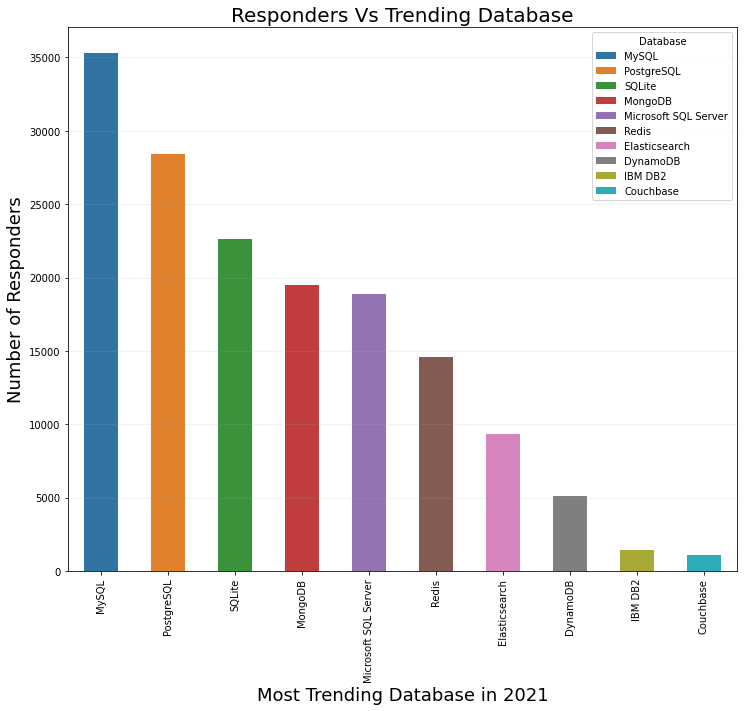

In [67]:
dataframe_plot = df_trending_database
plot_xaxis = "Database"
plot_yaxis = "NumberofResponders"
plot_category = "Database"
plot_xlabel = 'Most Trending Database in 2021'
plot_ylabel = 'Number of Responders'
plot_title = 'Responders Vs Trending Database'
width = 12
height = 10
plot_desired_tech(dataframe_plot, 
                  plot_xaxis, 
                  plot_yaxis, 
                  plot_category, 
                  plot_xlabel,
                  plot_ylabel, 
                  plot_title,width,height)

#### Most Trending Platform available in 2021

In [68]:
column_list=['ResponseId','PlatformHaveWorkedWith']
df_platform_1=dataset[column_list]
df_platform_1=df_platform_1.dropna()
df_platform_1

,ResponseId,PlatformHaveWorkedWith
2,3,Heroku
7,8,Heroku;Microsoft Azure
8,9,AWS
10,11,Microsoft Azure
11,12,AWS
...,...,...
83432,83433,Google Cloud Platform;Heroku
83434,83435,AWS
83436,83437,AWS;Google Cloud Platform
83437,83438,Heroku


In [69]:
def pltform_count(df,keyword):
    if keyword in df['PlatformHaveWorkedWith']:
        return 1
    else:
        return 0

In [70]:
df_platform_1.PlatformHaveWorkedWith.unique()

array(['Heroku', 'Heroku;Microsoft Azure', 'AWS', 'Microsoft Azure',
       'AWS;Google Cloud Platform', 'AWS;Heroku',
       'AWS;Google Cloud Platform;Microsoft Azure',
       'AWS;DigitalOcean;Heroku',
       'AWS;DigitalOcean;Google Cloud Platform;Heroku;Microsoft Azure',
       'Google Cloud Platform', 'AWS;DigitalOcean;Microsoft Azure',
       'AWS;DigitalOcean;Heroku;Microsoft Azure;Oracle Cloud Infrastructure',
       'AWS;DigitalOcean;Google Cloud Platform;Heroku;IBM Cloud or Watson;Microsoft Azure;Oracle Cloud Infrastructure',
       'AWS;Google Cloud Platform;Heroku',
       'AWS;IBM Cloud or Watson;Microsoft Azure', 'DigitalOcean',
       'AWS;Heroku;Microsoft Azure',
       'Google Cloud Platform;Microsoft Azure', 'AWS;Microsoft Azure',
       'AWS;DigitalOcean;Google Cloud Platform;Heroku',
       'DigitalOcean;IBM Cloud or Watson', 'AWS;DigitalOcean',
       'Google Cloud Platform;Heroku', 'DigitalOcean;Microsoft Azure',
       'DigitalOcean;Heroku', 'IBM Cloud or Watson

In [71]:
def creating_new_df_col(df, column_name_list, func_name):
  for key in column_name_list:
    df[key] = df.apply(func_name,keyword=key,axis=1)


column_name = ['Heroku','AWS','Microsoft','DigitalOcean','Google Cloud Platform','IBM Cloud or Watson','Oracle Cloud Infrastructure']
func_name = pltform_count
creating_new_df_col(df_platform_1, column_name, func_name)
df_platform_1

,ResponseId,PlatformHaveWorkedWith,Heroku,AWS,Microsoft,DigitalOcean,Google Cloud Platform,IBM Cloud or Watson,Oracle Cloud Infrastructure
2,3,Heroku,1,0,0,0,0,0,0
7,8,Heroku;Microsoft Azure,1,0,1,0,0,0,0
8,9,AWS,0,1,0,0,0,0,0
10,11,Microsoft Azure,0,0,1,0,0,0,0
11,12,AWS,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
83432,83433,Google Cloud Platform;Heroku,1,0,0,0,1,0,0
83434,83435,AWS,0,1,0,0,0,0,0
83436,83437,AWS;Google Cloud Platform,0,1,0,0,1,0,0
83437,83438,Heroku,1,0,0,0,0,0,0


In [72]:
df_platform_1_subset=df_platform_1.iloc[:,2:]
df_platform_1_subset

,Heroku,AWS,Microsoft,DigitalOcean,Google Cloud Platform,IBM Cloud or Watson,Oracle Cloud Infrastructure
2,1,0,0,0,0,0,0
7,1,0,1,0,0,0,0
8,0,1,0,0,0,0,0
10,0,0,1,0,0,0,0
11,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
83432,1,0,0,0,1,0,0
83434,0,1,0,0,0,0,0
83436,0,1,0,0,1,0,0
83437,1,0,0,0,0,0,0


In [73]:
df_platform_1_collated=df_platform_1_subset.sum()
df_platform_1_collated.columns=['Platform','NumberofResponders']
df_platform_1_collated

Heroku                         12897
AWS                            29138
Microsoft                      16540
DigitalOcean                    9495
Google Cloud Platform          16687
IBM Cloud or Watson             1373
Oracle Cloud Infrastructure     1014
dtype: int64

In [74]:
df_trending_platform=pd.DataFrame(df_platform_1_collated)
df_trending_platform.reset_index(inplace=True)
df_trending_platform.columns=['Platform','NumberofResponders']
df_trending_platform

,Platform,NumberofResponders
0,Heroku,12897
1,AWS,29138
2,Microsoft,16540
3,DigitalOcean,9495
4,Google Cloud Platform,16687
5,IBM Cloud or Watson,1373
6,Oracle Cloud Infrastructure,1014


In [75]:
df_trending_platform=df_trending_platform.sort_values(by='NumberofResponders',ascending=False)
df_trending_platform

,Platform,NumberofResponders
1,AWS,29138
4,Google Cloud Platform,16687
2,Microsoft,16540
0,Heroku,12897
3,DigitalOcean,9495
5,IBM Cloud or Watson,1373
6,Oracle Cloud Infrastructure,1014


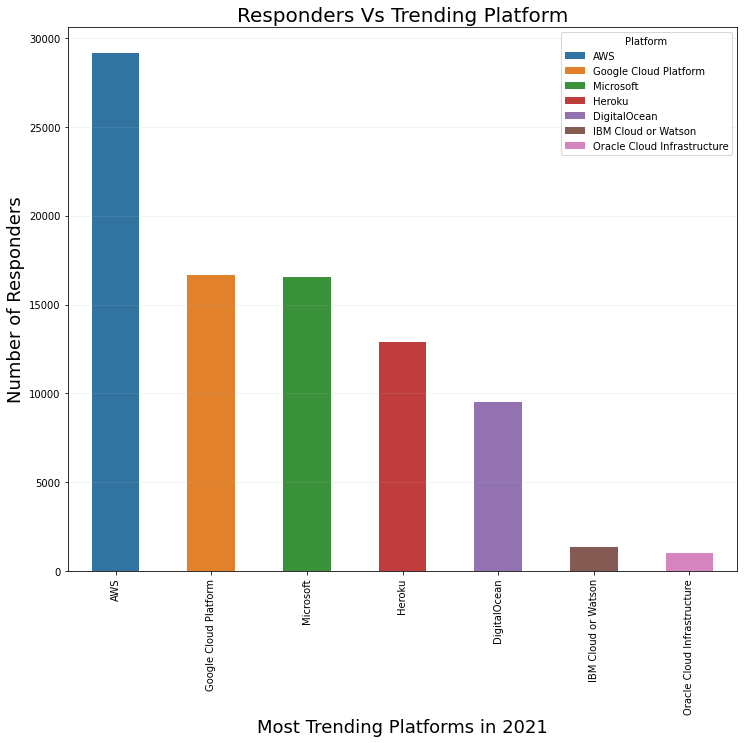

In [76]:
dataframe_plot = df_trending_platform
plot_xaxis = "Platform"
plot_yaxis = "NumberofResponders"
plot_category = "Platform"
plot_xlabel = 'Most Trending Platforms in 2021'
plot_ylabel = 'Number of Responders'
plot_title = 'Responders Vs Trending Platform'
width = 12
height = 10
plot_desired_tech(dataframe_plot, 
                  plot_xaxis, 
                  plot_yaxis, 
                  plot_category, 
                  plot_xlabel,
                  plot_ylabel, 
                  plot_title,width,height)

#### Most Trending Web-framework available in 2021

In [77]:
column_list=['ResponseId','WebframeHaveWorkedWith']
df_webframe_1=dataset[column_list]
df_webframe_1=df_webframe_1.dropna()
df_webframe_1

,ResponseId,WebframeHaveWorkedWith
0,1,Laravel;Symfony
1,2,Angular;Flask;Vue.js
2,3,Flask
3,4,Angular;jQuery
4,5,Flask
...,...,...
83433,83434,React.js
83435,83436,Django;jQuery;Laravel;React.js;Ruby on Rails
83436,83437,FastAPI;Flask
83437,83438,Django;Express;Flask;React.js


In [78]:
def webframe_count(df,keyword):
    if keyword in df['WebframeHaveWorkedWith']:
        return 1
    else:
        return 0

In [79]:
df_webframe_1.WebframeHaveWorkedWith.unique()

array(['Laravel;Symfony', 'Angular;Flask;Vue.js', 'Flask', ...,
       'Angular;Express;jQuery;Laravel;Ruby on Rails;Vue.js',
       'ASP.NET;Django;FastAPI;jQuery;React.js',
       'Django;Flask;Laravel;React.js;Symfony;Vue.js'], dtype=object)

In [80]:
def creating_new_df_col(df, column_name_list, func_name):
  for key in column_name_list:
    df[key] = df.apply(func_name,keyword=key,axis=1)


column_name = ['Flask','Angular','jQuery','Laravel','Symfony','Express','React.js','FastAPI','Gatsby','Laravel','Vue.js','ASP.NET','ASP.NET Core','Ruby on Rails']
func_name = webframe_count
creating_new_df_col(df_webframe_1, column_name, func_name)
df_webframe_1

,ResponseId,WebframeHaveWorkedWith,Flask,Angular,jQuery,Laravel,Symfony,Express,React.js,FastAPI,Gatsby,Vue.js,ASP.NET,ASP.NET Core,Ruby on Rails
0,1,Laravel;Symfony,0,0,0,1,1,0,0,0,0,0,0,0,0
1,2,Angular;Flask;Vue.js,1,1,0,0,0,0,0,0,0,1,0,0,0
2,3,Flask,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Angular;jQuery,0,1,1,0,0,0,0,0,0,0,0,0,0
4,5,Flask,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83433,83434,React.js,0,0,0,0,0,0,1,0,0,0,0,0,0
83435,83436,Django;jQuery;Laravel;React.js;Ruby on Rails,0,0,1,1,0,0,1,0,0,0,0,0,1
83436,83437,FastAPI;Flask,1,0,0,0,0,0,0,1,0,0,0,0,0
83437,83438,Django;Express;Flask;React.js,1,0,0,0,0,1,1,0,0,0,0,0,0


In [81]:
df_webframe_1_subset=df_webframe_1.iloc[:,2:]
df_webframe_1_subset

,Flask,Angular,jQuery,Laravel,Symfony,Express,React.js,FastAPI,Gatsby,Vue.js,ASP.NET,ASP.NET Core,Ruby on Rails
0,0,0,0,1,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83433,0,0,0,0,0,0,1,0,0,0,0,0,0
83435,0,0,1,1,0,0,1,0,0,0,0,0,1
83436,1,0,0,0,0,0,0,1,0,0,0,0,0
83437,1,0,0,0,0,1,1,0,0,0,0,0,0


In [82]:
df_webframe_1_collated=df_webframe_1_subset.sum()
df_webframe_1_collated.columns=['Web-Framework','NumberofResponders']
df_webframe_1_collated

Flask            10174
Angular          17259
jQuery           21693
Laravel           6377
Symfony           2427
Express          15010
React.js         25296
FastAPI           2447
Gatsby            2501
Vue.js           11954
ASP.NET          14283
ASP.NET Core     11404
Ruby on Rails     4438
dtype: int64

In [83]:
df_trending_webFramework=pd.DataFrame(df_webframe_1_collated)
df_trending_webFramework.reset_index(inplace=True)
df_trending_webFramework.columns=['Web-Framework','NumberofResponders']
df_trending_webFramework

,Web-Framework,NumberofResponders
0,Flask,10174
1,Angular,17259
2,jQuery,21693
3,Laravel,6377
4,Symfony,2427
5,Express,15010
6,React.js,25296
7,FastAPI,2447
8,Gatsby,2501
9,Vue.js,11954


In [84]:
df_trending_webFramework=df_trending_webFramework.sort_values(by='NumberofResponders',ascending=False)
df_trending_webFramework

,Web-Framework,NumberofResponders
6,React.js,25296
2,jQuery,21693
1,Angular,17259
5,Express,15010
10,ASP.NET,14283
9,Vue.js,11954
11,ASP.NET Core,11404
0,Flask,10174
3,Laravel,6377
12,Ruby on Rails,4438


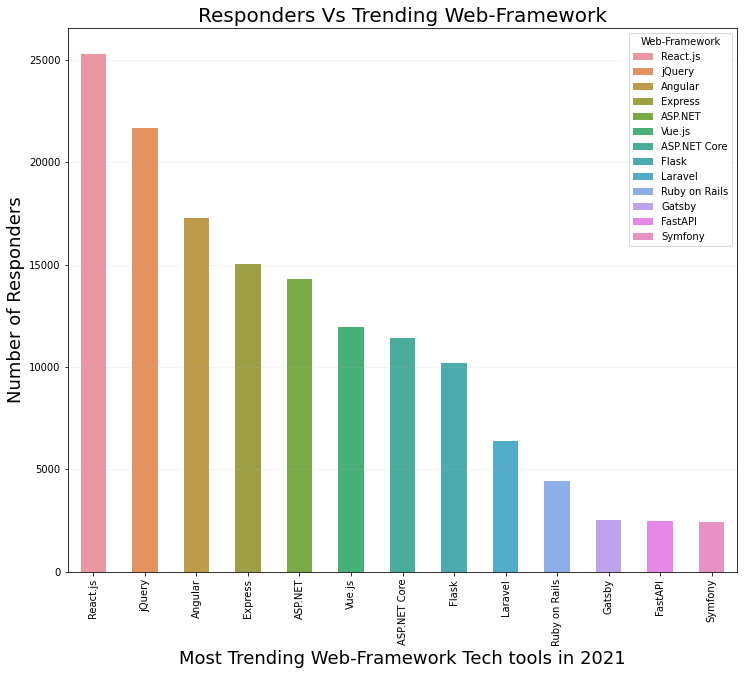

In [85]:
dataframe_plot = df_trending_webFramework
plot_xaxis = "Web-Framework"
plot_yaxis = "NumberofResponders"
plot_category = "Web-Framework"
plot_xlabel = 'Most Trending Web-Framework Tech tools in 2021'
plot_ylabel = 'Number of Responders'
plot_title = 'Responders Vs Trending Web-Framework'
width = 12
height = 10
plot_desired_tech(dataframe_plot, 
                  plot_xaxis, 
                  plot_yaxis, 
                  plot_category, 
                  plot_xlabel,
                  plot_ylabel, 
                  plot_title,width, height)

#### Most Trending Miscellaneous Tech available in 2021

In [86]:
column_list=['ResponseId','MiscTechHaveWorkedWith']
df_miscTech_1=dataset[column_list]
df_miscTech_1=df_miscTech_1.dropna()
df_miscTech_1

,ResponseId,MiscTechHaveWorkedWith
1,2,Cordova
2,3,NumPy;Pandas;TensorFlow;Torch/PyTorch
4,5,Apache Spark;Hadoop;NumPy;Pandas
5,6,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch
9,10,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch
...,...,...
83432,83433,NumPy;Pandas;TensorFlow;Torch/PyTorch
83433,83434,React Native
83435,83436,Flutter;Qt
83436,83437,Hadoop;Keras;NumPy;Pandas


In [87]:
def miscTech_count(df,keyword):
    if keyword in df['MiscTechHaveWorkedWith']:
        return 1
    else:
        return 0

In [88]:
df_miscTech_1.MiscTechHaveWorkedWith.unique()

array(['Cordova', 'NumPy;Pandas;TensorFlow;Torch/PyTorch',
       'Apache Spark;Hadoop;NumPy;Pandas', ...,
       '.NET Framework;.NET Core / .NET 5;Apache Spark;NumPy;Pandas;Torch/PyTorch',
       '.NET Framework;Apache Spark;Keras;NumPy;Pandas;Qt;React Native;TensorFlow;Torch/PyTorch',
       '.NET Framework;.NET Core / .NET 5;Flutter;Hadoop;NumPy;Pandas;React Native'],
      dtype=object)

In [89]:
def creating_new_df_col(df, column_name_list, func_name):
  for key in column_name_list:
    df[key] = df.apply(func_name,keyword=key,axis=1)


column_name = ['Keras','NumPy','Pandas','TensorFlow','Cordova','Torch/PyTorch','Hadoop','Qt','React Native','.NET Framework','.NET Core / .NET 5','Apache Spark']
func_name = miscTech_count
creating_new_df_col(df_miscTech_1, column_name, func_name)
df_miscTech_1

,ResponseId,MiscTechHaveWorkedWith,Keras,NumPy,Pandas,TensorFlow,Cordova,Torch/PyTorch,Hadoop,Qt,React Native,.NET Framework,.NET Core / .NET 5,Apache Spark
1,2,Cordova,0,0,0,0,1,0,0,0,0,0,0,0
2,3,NumPy;Pandas;TensorFlow;Torch/PyTorch,0,1,1,1,0,1,0,0,0,0,0,0
4,5,Apache Spark;Hadoop;NumPy;Pandas,0,1,1,0,0,0,1,0,0,0,0,1
5,6,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,1,1,1,1,0,1,0,0,0,0,0,0
9,10,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,1,1,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83432,83433,NumPy;Pandas;TensorFlow;Torch/PyTorch,0,1,1,1,0,1,0,0,0,0,0,0
83433,83434,React Native,0,0,0,0,0,0,0,0,1,0,0,0
83435,83436,Flutter;Qt,0,0,0,0,0,0,0,1,0,0,0,0
83436,83437,Hadoop;Keras;NumPy;Pandas,1,1,1,0,0,0,1,0,0,0,0,0


In [90]:
df_miscTech_1_subset=df_miscTech_1.iloc[:,2:]
df_miscTech_1_subset

,Keras,NumPy,Pandas,TensorFlow,Cordova,Torch/PyTorch,Hadoop,Qt,React Native,.NET Framework,.NET Core / .NET 5,Apache Spark
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,1,1,0,1,0,0,0,0,0,0
4,0,1,1,0,0,0,1,0,0,0,0,1
5,1,1,1,1,0,1,0,0,0,0,0,0
9,1,1,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
83432,0,1,1,1,0,1,0,0,0,0,0,0
83433,0,0,0,0,0,0,0,0,1,0,0,0
83435,0,0,0,0,0,0,0,1,0,0,0,0
83436,1,1,1,0,0,0,1,0,0,0,0,0


In [91]:
df_miscTech_1_collated=df_miscTech_1_subset.sum()
df_miscTech_1_collated.columns=['Miscellaneous_Tech','NumberofResponders']
df_miscTech_1_collated

Keras                  4930
NumPy                 16445
Pandas                13664
TensorFlow             8034
Cordova                3491
Torch/PyTorch          4808
Hadoop                 2155
Qt                     4812
React Native           7051
.NET Framework        16620
.NET Core / .NET 5    15310
Apache Spark           2833
dtype: int64

In [92]:
df_trending_miscTech=pd.DataFrame(df_miscTech_1_collated)
df_trending_miscTech.reset_index(inplace=True)
df_trending_miscTech.columns=['Miscellaneous_Tech','NumberofResponders']
df_trending_miscTech

,Miscellaneous_Tech,NumberofResponders
0,Keras,4930
1,NumPy,16445
2,Pandas,13664
3,TensorFlow,8034
4,Cordova,3491
5,Torch/PyTorch,4808
6,Hadoop,2155
7,Qt,4812
8,React Native,7051
9,.NET Framework,16620


In [93]:
df_trending_miscTech=df_trending_miscTech.sort_values(by='NumberofResponders',ascending=False)
df_trending_miscTech

,Miscellaneous_Tech,NumberofResponders
9,.NET Framework,16620
1,NumPy,16445
10,.NET Core / .NET 5,15310
2,Pandas,13664
3,TensorFlow,8034
8,React Native,7051
0,Keras,4930
7,Qt,4812
5,Torch/PyTorch,4808
4,Cordova,3491


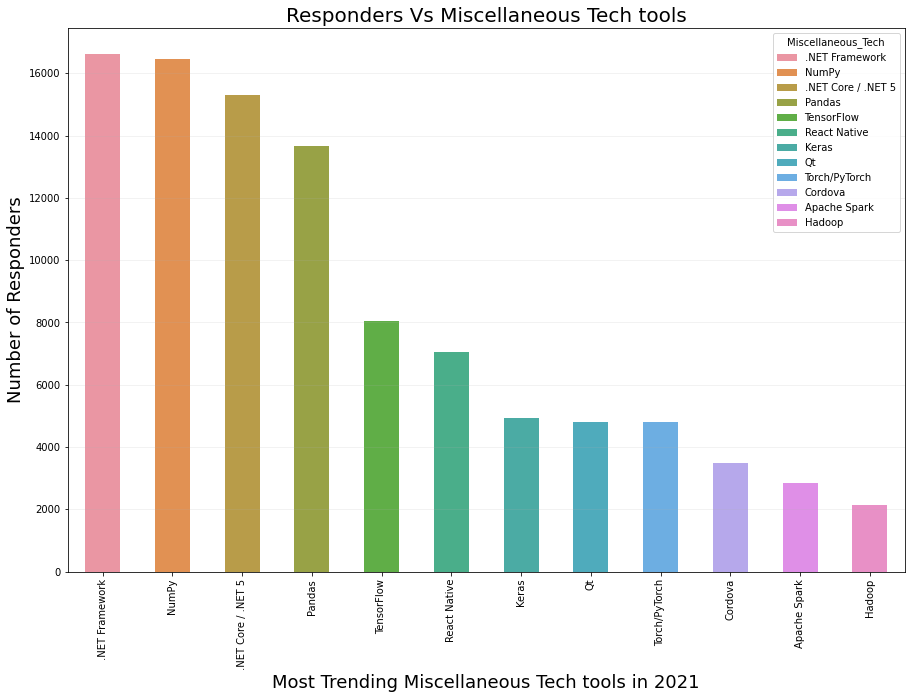

In [94]:
dataframe_plot = df_trending_miscTech
plot_xaxis = "Miscellaneous_Tech"
plot_yaxis = "NumberofResponders"
plot_category = "Miscellaneous_Tech"
plot_xlabel = 'Most Trending Miscellaneous Tech tools in 2021'
plot_ylabel = 'Number of Responders'
plot_title = 'Responders Vs Miscellaneous Tech tools'
width = 15
height = 10
plot_desired_tech(dataframe_plot, 
                  plot_xaxis, 
                  plot_yaxis, 
                  plot_category, 
                  plot_xlabel,
                  plot_ylabel, 
                  plot_title,width,height)

#### Most Trending ToolsTech available in 2021

In [95]:
column_list=['ResponseId','ToolsTechHaveWorkedWith']
df_toolsTech_1=dataset[column_list]
df_toolsTech_1=df_toolsTech_1.dropna()
df_toolsTech_1

,ResponseId,ToolsTechHaveWorkedWith
1,2,Docker;Git;Yarn
4,5,Docker;Git;Kubernetes;Yarn
5,6,Git
8,9,Docker;Git
9,10,Git
...,...,...
83434,83435,Docker;Git
83435,83436,Git;Unity 3D;Unreal Engine
83436,83437,Ansible;Docker;Git;Terraform
83437,83438,Ansible;Docker;Git;Terraform


In [96]:
def toolstech_count(df,keyword):
    if keyword in df['ToolsTechHaveWorkedWith']:
        return 1
    else:
        return 0

In [97]:
df_toolsTech_1.ToolsTechHaveWorkedWith.unique()

array(['Docker;Git;Yarn', 'Docker;Git;Kubernetes;Yarn', 'Git',
       'Docker;Git', 'Git;Kubernetes', 'Unity 3D',
       'Docker;Git;Kubernetes', 'Docker;Git;Kubernetes;Terraform',
       'Git;Yarn', 'Git;Unity 3D', 'Docker;Git;Terraform',
       'Flow;Unity 3D', 'Docker;Git;Kubernetes;Unity 3D;Unreal Engine',
       'Docker;Kubernetes', 'Ansible;Git;Terraform;Yarn', 'Terraform',
       'Deno;Docker;Git', 'Docker;Git;Unity 3D',
       'Docker;Git;Terraform;Unity 3D', 'Ansible;Git',
       'Docker;Git;Unreal Engine',
       'Docker;Git;Kubernetes;Puppet;Terraform;Unity 3D',
       'Deno;Docker;Git;Kubernetes;Yarn',
       'Ansible;Git;Kubernetes;Xamarin', 'Docker;Git;Terraform;Yarn',
       'Docker', 'Ansible;Docker;Git;Kubernetes;Terraform;Xamarin',
       'Git;Kubernetes;Xamarin;Yarn', 'Ansible;Docker;Git',
       'Docker;Git;Puppet', 'Ansible;Docker;Git;Kubernetes',
       'Docker;Git;Kubernetes;Puppet;Unity 3D', 'Deno;Docker;Puppet',
       'Ansible;Chef;Docker;Terraform;Unity 3D',


In [98]:
def creating_new_df_col(df, column_name_list, func_name):
  for key in column_name_list:
    df[key] = df.apply(func_name,keyword=key,axis=1)


column_name = ['Git','Docker','Kubernetes','Yarn','Unity 3D','Unreal Engine','Pulumi','Ansible','Deno','Terraform','Flow','Pulumi','Chef','Xamarin']
func_name = toolstech_count
creating_new_df_col(df_toolsTech_1, column_name, func_name)
df_toolsTech_1

,ResponseId,ToolsTechHaveWorkedWith,Git,Docker,Kubernetes,Yarn,Unity 3D,Unreal Engine,Pulumi,Ansible,Deno,Terraform,Flow,Chef,Xamarin
1,2,Docker;Git;Yarn,1,1,0,1,0,0,0,0,0,0,0,0,0
4,5,Docker;Git;Kubernetes;Yarn,1,1,1,1,0,0,0,0,0,0,0,0,0
5,6,Git,1,0,0,0,0,0,0,0,0,0,0,0,0
8,9,Docker;Git,1,1,0,0,0,0,0,0,0,0,0,0,0
9,10,Git,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,Docker;Git,1,1,0,0,0,0,0,0,0,0,0,0,0
83435,83436,Git;Unity 3D;Unreal Engine,1,0,0,0,1,1,0,0,0,0,0,0,0
83436,83437,Ansible;Docker;Git;Terraform,1,1,0,0,0,0,0,1,0,1,0,0,0
83437,83438,Ansible;Docker;Git;Terraform,1,1,0,0,0,0,0,1,0,1,0,0,0


In [99]:
df_toolsTech_1_subset=df_toolsTech_1.iloc[:,2:]
df_toolsTech_1_subset

,Git,Docker,Kubernetes,Yarn,Unity 3D,Unreal Engine,Pulumi,Ansible,Deno,Terraform,Flow,Chef,Xamarin
1,1,1,0,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,1,1,0,0,0,0,0,0,0,0,0,0,0
83435,1,0,0,0,1,1,0,0,0,0,0,0,0
83436,1,1,0,0,0,0,0,1,0,1,0,0,0
83437,1,1,0,0,0,0,0,1,0,1,0,0,0


In [100]:
df_toolsTech_1_collated=df_toolsTech_1_subset.sum()
df_toolsTech_1_collated.columns=['Tools_Tech','NumberofResponders']
df_toolsTech_1_collated

Git              68171
Docker           35644
Kubernetes       12115
Yarn             12937
Unity 3D          7206
Unreal Engine     2339
Pulumi             368
Ansible           5607
Deno              1027
Terraform         5442
Flow               929
Chef               982
Xamarin           2844
dtype: int64

In [101]:
df_trending_toolsTech=pd.DataFrame(df_toolsTech_1_collated)
df_trending_toolsTech.reset_index(inplace=True)
df_trending_toolsTech.columns=['Tools_Tech','NumberofResponders']
df_trending_toolsTech

,Tools_Tech,NumberofResponders
0,Git,68171
1,Docker,35644
2,Kubernetes,12115
3,Yarn,12937
4,Unity 3D,7206
5,Unreal Engine,2339
6,Pulumi,368
7,Ansible,5607
8,Deno,1027
9,Terraform,5442


In [102]:
df_trending_toolsTech=df_trending_toolsTech.sort_values(by='NumberofResponders',ascending=False)
df_trending_toolsTech

,Tools_Tech,NumberofResponders
0,Git,68171
1,Docker,35644
3,Yarn,12937
2,Kubernetes,12115
4,Unity 3D,7206
7,Ansible,5607
9,Terraform,5442
12,Xamarin,2844
5,Unreal Engine,2339
8,Deno,1027


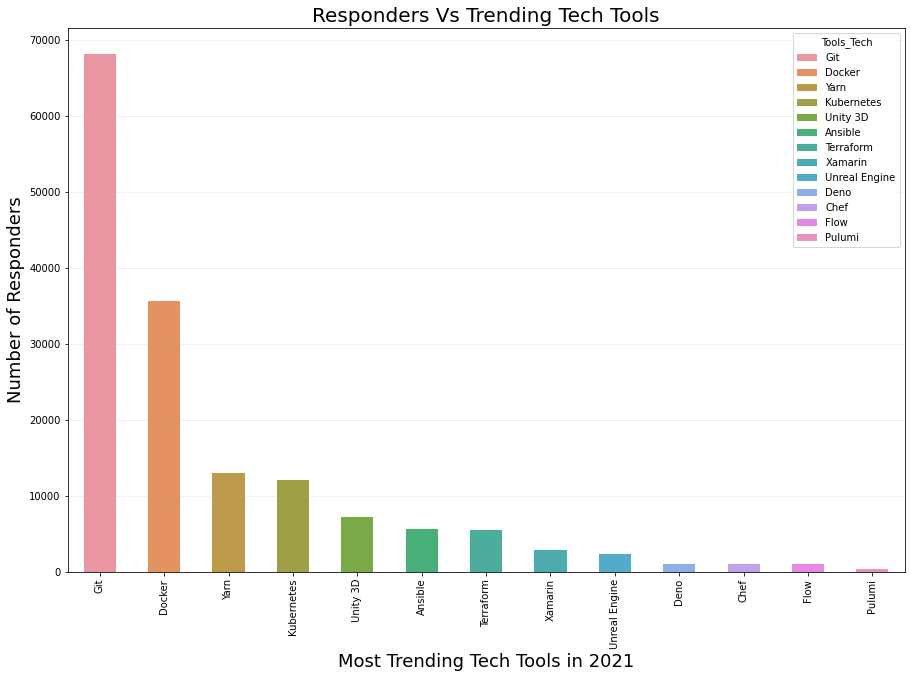

In [103]:
dataframe_plot = df_trending_toolsTech
plot_xaxis = "Tools_Tech"
plot_yaxis = "NumberofResponders"
plot_category = "Tools_Tech"
plot_xlabel = 'Most Trending Tech Tools in 2021'
plot_ylabel = 'Number of Responders'
plot_title = 'Responders Vs Trending Tech Tools'
width = 15
height = 10
plot_desired_tech(dataframe_plot, 
                  plot_xaxis, 
                  plot_yaxis, 
                  plot_category, 
                  plot_xlabel,
                  plot_ylabel, 
                  plot_title,width,height)

### **Top Desired Technologies which included Programming languages, Database, WebFrame work, Platform, Miscellaneous and Tools in 2021** 

#### Analyze Most Desired coding language


In [104]:
#Most desired Coding Language
column_list=['ResponseId','LanguageWantToWorkWith']
df_language_desired=data_subset[column_list]
df_language_desired=df_language_desired.dropna()
df_language_desired

,ResponseId,LanguageWantToWorkWith
0,1,Swift
2,3,Julia;Python;Rust
3,4,JavaScript;TypeScript
4,5,Bash/Shell;HTML/CSS;Python;SQL
5,6,C#;C++;Go;HTML/CSS;Java;JavaScript;Node.js;Obj...
...,...,...
83433,83434,Kotlin
83434,83435,Clojure
83436,83437,Java;Python
83437,83438,Go;Rust


In [105]:
df_language_desired.LanguageWantToWorkWith.unique()

array(['Swift', 'Julia;Python;Rust', 'JavaScript;TypeScript', ...,
       'APL;Clojure;Haskell;LISP;R', 'Java;Ruby;TypeScript',
       'Elixir;HTML/CSS;Java;JavaScript;Node.js;PHP;SQL;TypeScript'],
      dtype=object)

In [106]:
def language_count_desire(df,lang):
    if lang in df['LanguageWantToWorkWith']:
        return 1
    else:
        return 0

In [107]:
df_language_desired['JavaScript']=df_language_desired.apply(language_count_desire,lang='JavaScript',axis=1)
df_language_desired['Python']=df_language_desired.apply(language_count_desire,lang='Python',axis=1)
df_language_desired['HTML']=df_language_desired.apply(language_count_desire,lang='HTML',axis=1)
df_language_desired['CSS']=df_language_desired.apply(language_count_desire,lang='CSS',axis=1)
df_language_desired['Go']=df_language_desired.apply(language_count_desire,lang='Go',axis=1)
df_language_desired['SQL']=df_language_desired.apply(language_count_desire,lang='SQL',axis=1)
df_language_desired['R']=df_language_desired.apply(language_count_desire,lang='R',axis=1)
df_language_desired['Bash/Shell']=df_language_desired.apply(language_count_desire,lang='Bash/Shell',axis=1)
df_language_desired['TypeScript']=df_language_desired.apply(language_count_desire,lang='TypeScript',axis=1)
df_language_desired['C#']=df_language_desired.apply(language_count_desire,lang='C#',axis=1)
df_language_desired

,ResponseId,LanguageWantToWorkWith,JavaScript,Python,HTML,CSS,Go,SQL,R,Bash/Shell,TypeScript,C#
0,1,Swift,0,0,0,0,0,0,0,0,0,0
2,3,Julia;Python;Rust,0,1,0,0,0,0,1,0,0,0
3,4,JavaScript;TypeScript,1,0,0,0,0,0,0,0,1,0
4,5,Bash/Shell;HTML/CSS;Python;SQL,0,1,1,1,0,1,0,1,0,0
5,6,C#;C++;Go;HTML/CSS;Java;JavaScript;Node.js;Obj...,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
83433,83434,Kotlin,0,0,0,0,0,0,0,0,0,0
83434,83435,Clojure,0,0,0,0,0,0,0,0,0,0
83436,83437,Java;Python,0,1,0,0,0,0,0,0,0,0
83437,83438,Go;Rust,0,0,0,0,1,0,1,0,0,0


In [108]:
df_language_desired_subset=df_language_desired.iloc[:,2:]
df_language_desired_subset

,JavaScript,Python,HTML,CSS,Go,SQL,R,Bash/Shell,TypeScript,C#
0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,1,0
4,0,1,1,1,0,1,0,1,0,0
5,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
83433,0,0,0,0,0,0,0,0,0,0
83434,0,0,0,0,0,0,0,0,0,0
83436,0,1,0,0,0,0,0,0,0,0
83437,0,0,0,0,1,0,1,0,0,0


In [109]:
df_language_desire_collated=df_language_desired_subset.sum()


In [110]:
df_desired_lang=pd.DataFrame(df_language_desire_collated)
df_desired_lang.reset_index(inplace=True)
df_desired_lang.columns=['MostDesiredCodingLanguage','NumberofResponders']

In [111]:
df_desired_lang=df_desired_lang.sort_values(by='NumberofResponders',ascending=False)
df_desired_lang

,MostDesiredCodingLanguage,NumberofResponders
0,JavaScript,37008
1,Python,34929
2,HTML,29353
3,CSS,29353
8,TypeScript,26905
5,SQL,26631
6,R,22350
9,C#,17999
4,Go,15788
7,Bash/Shell,14043


In [112]:
df_desired_lang=df_desired_lang.head(10)

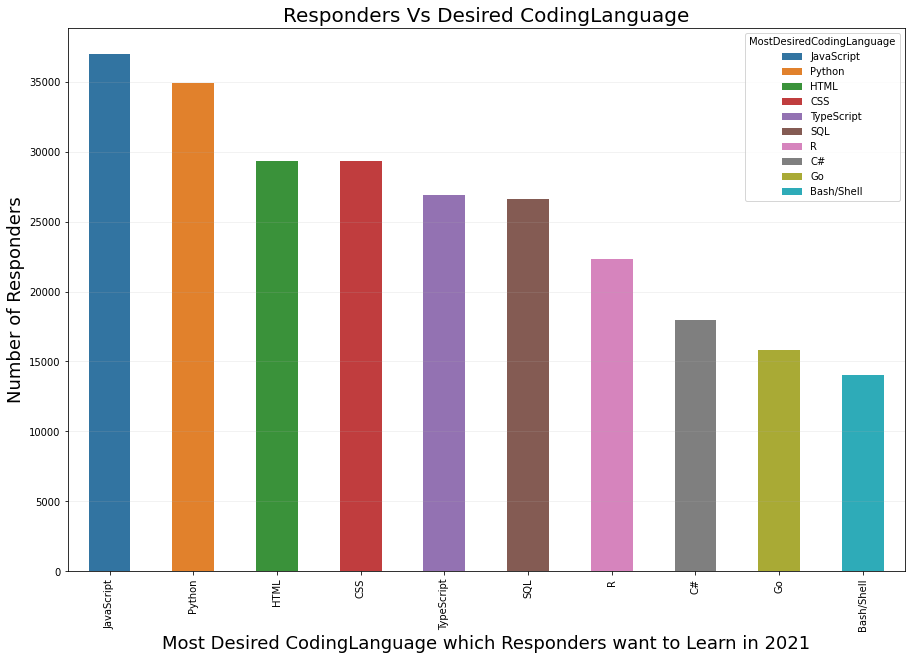

In [113]:
dataframe_plot = df_desired_lang
plot_xaxis = "MostDesiredCodingLanguage"
plot_yaxis = "NumberofResponders"
plot_category = "MostDesiredCodingLanguage"
plot_xlabel = 'Most Desired CodingLanguage which Responders want to Learn in 2021'
plot_ylabel = 'Number of Responders'
plot_title = 'Responders Vs Desired CodingLanguage'
width = 15
height = 10
plot_desired_tech(dataframe_plot, 
                  plot_xaxis, 
                  plot_yaxis, 
                  plot_category, 
                  plot_xlabel,
                  plot_ylabel, 
                  plot_title,width,height)

#### Analyze Most Desired Database

In [114]:
column_list=['ResponseId','DatabaseWantToWorkWith']
df_database_desired=dataset[column_list]
df_database_desired=df_database_desired.dropna()
df_database_desired

,ResponseId,DatabaseWantToWorkWith
0,1,SQLite
2,3,SQLite
4,5,Cassandra;Elasticsearch;PostgreSQL;Redis
5,6,Elasticsearch;Firebase;IBM DB2;MariaDB;Microso...
7,8,PostgreSQL
...,...,...
83431,83432,DynamoDB;Firebase;MongoDB;MySQL;SQLite
83434,83435,SQLite
83435,83436,Firebase;MariaDB;MongoDB;MySQL;PostgreSQL;Redi...
83436,83437,DynamoDB;Redis


In [115]:
df_database_desired.DatabaseWantToWorkWith.unique()
df_database_desired.DatabaseWantToWorkWith.astype(str)

0                                                   SQLite
2                                                   SQLite
4                 Cassandra;Elasticsearch;PostgreSQL;Redis
5        Elasticsearch;Firebase;IBM DB2;MariaDB;Microso...
7                                               PostgreSQL
                               ...                        
83431               DynamoDB;Firebase;MongoDB;MySQL;SQLite
83434                                               SQLite
83435    Firebase;MariaDB;MongoDB;MySQL;PostgreSQL;Redi...
83436                                       DynamoDB;Redis
83438    Elasticsearch;MongoDB;MySQL;Oracle;PostgreSQL;...
Name: DatabaseWantToWorkWith, Length: 58299, dtype: object

In [116]:
df_str = pd.DataFrame()

In [117]:
def database(df_database_desired, database_name):
    if database_name in df_database_desired['DatabaseWantToWorkWith']:
      return 1
    else:
      return 0
    return 0



In [118]:
df_database_desired['SQLite']=df_database_desired.apply(database,database_name='SQLite',axis=1)
df_database_desired['Cassandra']=df_database_desired.apply(database,database_name='Cassandra',axis=1)
df_database_desired['Elasticsearch']=df_database_desired.apply(database,database_name='Elasticsearch',axis=1)
df_database_desired['DynamoDB']=df_database_desired.apply(database,database_name='DynamoDB',axis=1)
df_database_desired['Firebase']=df_database_desired.apply(database,database_name='Firebase',axis=1)
df_database_desired['SQL']=df_database_desired.apply(database,database_name='SQL',axis=1)
df_database_desired['MySQL']=df_database_desired.apply(database,database_name='MySQL',axis=1)
df_database_desired['PostgreSQL']=df_database_desired.apply(database,database_name='PostgreSQL',axis=1)
df_database_desired['SQLite']=df_database_desired.apply(database,database_name='SQLite',axis=1)
df_database_desired['MongoDB']=df_database_desired.apply(database,database_name='MongoDB',axis=1)
df_database_desired['Redis']=df_database_desired.apply(database,database_name='Redis',axis=1)
df_database_desired['IBM DB2']=df_database_desired.apply(database,database_name='IBM DB2',axis=1)
df_database_desired['Microsoft SQL Server']=df_database_desired.apply(database,database_name='Microsoft SQL Server',axis=1)
df_database_desired['Oracle']=df_database_desired.apply(database,database_name='Oracle',axis=1)
df_database_desired['MariaDB']=df_database_desired.apply(database,database_name='MariaDB',axis=1)
df_database_desired

,ResponseId,DatabaseWantToWorkWith,SQLite,Cassandra,Elasticsearch,DynamoDB,Firebase,SQL,MySQL,PostgreSQL,MongoDB,Redis,IBM DB2,Microsoft SQL Server,Oracle,MariaDB
0,1,SQLite,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3,SQLite,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5,Cassandra;Elasticsearch;PostgreSQL;Redis,0,1,1,0,0,1,0,1,0,1,0,0,0,0
5,6,Elasticsearch;Firebase;IBM DB2;MariaDB;Microso...,1,0,1,0,1,1,1,1,0,0,1,1,0,1
7,8,PostgreSQL,0,0,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83431,83432,DynamoDB;Firebase;MongoDB;MySQL;SQLite,1,0,0,1,1,1,1,0,1,0,0,0,0,0
83434,83435,SQLite,1,0,0,0,0,1,0,0,0,0,0,0,0,0
83435,83436,Firebase;MariaDB;MongoDB;MySQL;PostgreSQL;Redi...,1,0,0,0,1,1,1,1,1,1,0,0,0,1
83436,83437,DynamoDB;Redis,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [119]:
df_database_desired_subset=df_database_desired.iloc[:,2:]
df_database_desired_subset

,SQLite,Cassandra,Elasticsearch,DynamoDB,Firebase,SQL,MySQL,PostgreSQL,MongoDB,Redis,IBM DB2,Microsoft SQL Server,Oracle,MariaDB
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,1,0,1,0,0,0,0
5,1,0,1,0,1,1,1,1,0,0,1,1,0,1
7,0,0,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83431,1,0,0,1,1,1,1,0,1,0,0,0,0,0
83434,1,0,0,0,0,1,0,0,0,0,0,0,0,0
83435,1,0,0,0,1,1,1,1,1,1,0,0,0,1
83436,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [120]:
df_database_desired_collated=df_database_desired_subset.sum()

In [121]:
df_database_desired=pd.DataFrame(df_database_desired_collated)
df_database_desired.reset_index(inplace=True)
df_database_desired.columns=['MostDesiredDatabase','ResponseId']

In [122]:
df_database_desired=df_database_desired.sort_values(by='ResponseId',ascending=False)
df_database_desired

,MostDesiredDatabase,ResponseId
5,SQL,47767
7,PostgreSQL,27082
6,MySQL,20307
8,MongoDB,20131
9,Redis,17212
0,SQLite,15381
2,Elasticsearch,11644
11,Microsoft SQL Server,11394
4,Firebase,10776
13,MariaDB,8176


In [123]:
df_database_desired=df_database_desired.head(10)

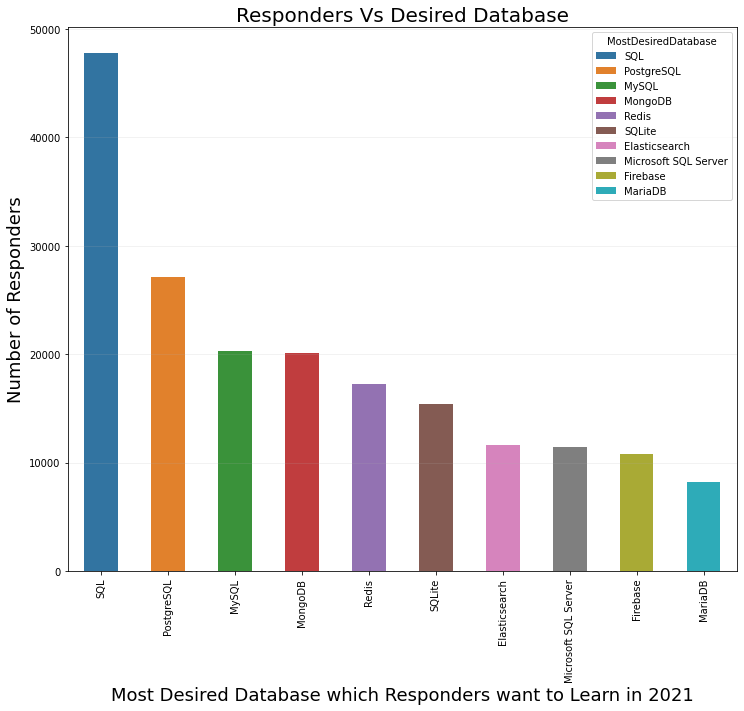

In [124]:
dataframe_plot = df_database_desired
plot_xaxis = "MostDesiredDatabase"
plot_yaxis = "ResponseId"
plot_category = "MostDesiredDatabase"
plot_xlabel = 'Most Desired Database which Responders want to Learn in 2021'
plot_ylabel = 'Number of Responders'
plot_title = 'Responders Vs Desired Database'
width = 12
height = 10
plot_desired_tech(dataframe_plot, 
                  plot_xaxis, 
                  plot_yaxis, 
                  plot_category, 
                  plot_xlabel,
                  plot_ylabel, 
                  plot_title,width,height)

#### Most desired Platform Tech Developers want to work

In [125]:
column_list=['ResponseId','PlatformWantToWorkWith']
df_desired_platform=dataset[column_list]
df_desired_platform=df_desired_platform.dropna()
df_desired_platform

,ResponseId,PlatformWantToWorkWith
7,8,Heroku
10,11,AWS;Microsoft Azure
13,14,DigitalOcean
16,17,AWS;Google Cloud Platform
24,25,AWS;Heroku
...,...,...
83431,83432,AWS;Google Cloud Platform
83434,83435,AWS
83436,83437,AWS
83437,83438,AWS;DigitalOcean


In [126]:
df_desired_platform.PlatformWantToWorkWith.unique()
df_desired_platform.PlatformWantToWorkWith.astype(str)

7                           Heroku
10             AWS;Microsoft Azure
13                    DigitalOcean
16       AWS;Google Cloud Platform
24                      AWS;Heroku
                   ...            
83431    AWS;Google Cloud Platform
83434                          AWS
83436                          AWS
83437             AWS;DigitalOcean
83438                          AWS
Name: PlatformWantToWorkWith, Length: 41619, dtype: object

In [127]:
def Platform(df_desired_platform, platform_name):
    if platform_name in df_desired_platform['PlatformWantToWorkWith']:
      return 1
    else:
      return 0
    return 0

In [128]:
df_desired_platform.PlatformWantToWorkWith.unique()

array(['Heroku', 'AWS;Microsoft Azure', 'DigitalOcean',
       'AWS;Google Cloud Platform', 'AWS;Heroku',
       'AWS;DigitalOcean;Google Cloud Platform;Heroku;IBM Cloud or Watson',
       'Google Cloud Platform', 'AWS;IBM Cloud or Watson;Microsoft Azure',
       'AWS', 'Microsoft Azure', 'AWS;DigitalOcean;Google Cloud Platform',
       'AWS;Google Cloud Platform;Heroku',
       'AWS;DigitalOcean;IBM Cloud or Watson',
       'AWS;Google Cloud Platform;Microsoft Azure',
       'Google Cloud Platform;Microsoft Azure',
       'AWS;DigitalOcean;Google Cloud Platform;Microsoft Azure',
       'AWS;DigitalOcean', 'AWS;DigitalOcean;Heroku',
       'DigitalOcean;Google Cloud Platform;Heroku',
       'AWS;DigitalOcean;Google Cloud Platform;Heroku;IBM Cloud or Watson;Microsoft Azure;Oracle Cloud Infrastructure',
       'AWS;Google Cloud Platform;Heroku;Microsoft Azure',
       'DigitalOcean;Heroku;Microsoft Azure',
       'AWS;DigitalOcean;Google Cloud Platform;Heroku;IBM Cloud or Watson;Microsof

In [129]:
df_desired_platform['Heroku']=df_desired_platform.apply(Platform,platform_name='Heroku',axis=1)
df_desired_platform['AWS']=df_desired_platform.apply(Platform,platform_name='AWS',axis=1)
df_desired_platform['Microsoft Azure']=df_desired_platform.apply(Platform,platform_name='Microsoft Azure',axis=1)
df_desired_platform['DigitalOcean']=df_desired_platform.apply(Platform,platform_name='DigitalOcean',axis=1)
df_desired_platform['Google Cloud Platform']=df_desired_platform.apply(Platform,platform_name='Google Cloud Platform',axis=1)
df_desired_platform['IBM Cloud or Watson']=df_desired_platform.apply(Platform,platform_name='IBM Cloud or Watson',axis=1)
df_desired_platform['Oracle Cloud Infrastructure']=df_desired_platform.apply(Platform,platform_name='Oracle Cloud Infrastructure',axis=1)
df_desired_platform

,ResponseId,PlatformWantToWorkWith,Heroku,AWS,Microsoft Azure,DigitalOcean,Google Cloud Platform,IBM Cloud or Watson,Oracle Cloud Infrastructure
7,8,Heroku,1,0,0,0,0,0,0
10,11,AWS;Microsoft Azure,0,1,1,0,0,0,0
13,14,DigitalOcean,0,0,0,1,0,0,0
16,17,AWS;Google Cloud Platform,0,1,0,0,1,0,0
24,25,AWS;Heroku,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
83431,83432,AWS;Google Cloud Platform,0,1,0,0,1,0,0
83434,83435,AWS,0,1,0,0,0,0,0
83436,83437,AWS,0,1,0,0,0,0,0
83437,83438,AWS;DigitalOcean,0,1,0,1,0,0,0


In [130]:
df_desired_platform_subset=df_desired_platform.iloc[:,2:]
df_desired_platform_subset

,Heroku,AWS,Microsoft Azure,DigitalOcean,Google Cloud Platform,IBM Cloud or Watson,Oracle Cloud Infrastructure
7,1,0,0,0,0,0,0
10,0,1,1,0,0,0,0
13,0,0,0,1,0,0,0
16,0,1,0,0,1,0,0
24,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...
83431,0,1,0,0,1,0,0
83434,0,1,0,0,0,0,0
83436,0,1,0,0,0,0,0
83437,0,1,0,1,0,0,0


In [131]:
df_desired_platform_collated=df_desired_platform_subset.sum()

In [132]:
df_desired_platform=pd.DataFrame(df_desired_platform_collated)
df_desired_platform.reset_index(inplace=True)
df_desired_platform.columns=['MostDesiredPlatform','ResponseId']

In [133]:
df_desired_platform=df_desired_platform.sort_values(by='ResponseId',ascending=False)
df_desired_platform

,MostDesiredPlatform,ResponseId
1,AWS,26295
4,Google Cloud Platform,16228
2,Microsoft Azure,15096
3,DigitalOcean,8674
0,Heroku,8182
5,IBM Cloud or Watson,1768
6,Oracle Cloud Infrastructure,1398


In [134]:
df_desired_platform=df_desired_platform.head(10)

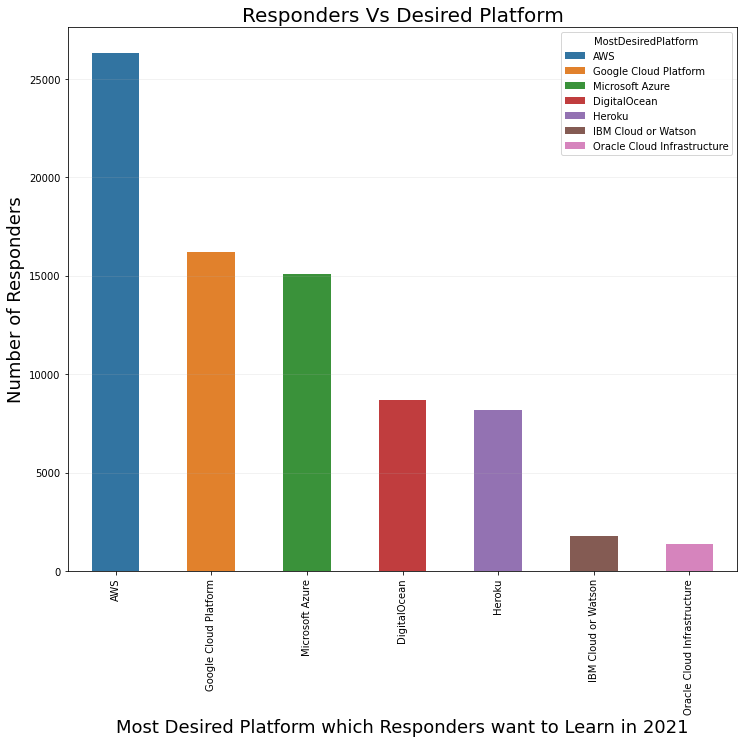

In [135]:
dataframe_plot = df_desired_platform
plot_xaxis = "MostDesiredPlatform"
plot_yaxis = "ResponseId"
plot_category = "MostDesiredPlatform"
plot_xlabel = 'Most Desired Platform which Responders want to Learn in 2021'
plot_ylabel = 'Number of Responders'
plot_title = 'Responders Vs Desired Platform'
width = 12
height = 10
plot_desired_tech(dataframe_plot, 
                  plot_xaxis, 
                  plot_yaxis, 
                  plot_category, 
                  plot_xlabel,
                  plot_ylabel, 
                  plot_title,width,height)

#### Most desired Web-Frame Tech Developers want to work

In [136]:
column_list=['ResponseId','WebframeWantToWorkWith']
df_desired_Webframe=dataset[column_list]
df_desired_Webframe=df_desired_Webframe.dropna()
df_desired_Webframe

,ResponseId,WebframeWantToWorkWith
2,3,Flask
3,4,Angular;jQuery
4,5,Flask
5,6,Express;Flask;jQuery;React.js
6,7,jQuery
...,...,...
83429,83430,Angular.js;ASP.NET;ASP.NET Core ;Django;FastAP...
83431,83432,Angular;Django;Flask;jQuery;Laravel
83435,83436,Django;Express;jQuery;Laravel;React.js;Ruby on...
83436,83437,FastAPI;Flask


In [137]:
df_desired_Webframe.WebframeWantToWorkWith.unique()
df_desired_Webframe.WebframeWantToWorkWith.astype(str)

2                                                    Flask
3                                           Angular;jQuery
4                                                    Flask
5                            Express;Flask;jQuery;React.js
6                                                   jQuery
                               ...                        
83429    Angular.js;ASP.NET;ASP.NET Core ;Django;FastAP...
83431                  Angular;Django;Flask;jQuery;Laravel
83435    Django;Express;jQuery;Laravel;React.js;Ruby on...
83436                                        FastAPI;Flask
83438                       Express;Laravel;Spring;Symfony
Name: WebframeWantToWorkWith, Length: 52095, dtype: object

In [138]:
def webFrame(df_desired_Webframe, webframe_name):
    if webframe_name in df_desired_Webframe['WebframeWantToWorkWith']:
      return 1
    else:
      return 0
    return 0

In [139]:
df_desired_Webframe.WebframeWantToWorkWith.unique()

array(['Flask', 'Angular;jQuery', 'Express;Flask;jQuery;React.js', ...,
       'Django;FastAPI;Flask;Gatsby;Laravel;React.js;Vue.js',
       'Angular.js;ASP.NET;ASP.NET Core ;Django;FastAPI;Flask;jQuery;React.js;Ruby on Rails;Vue.js',
       'Django;Express;jQuery;Laravel;React.js;Ruby on Rails;Vue.js'],
      dtype=object)

In [140]:
df_desired_Webframe['Flask']=df_desired_Webframe.apply(webFrame,webframe_name='Flask',axis=1)
df_desired_Webframe['Angular']=df_desired_Webframe.apply(webFrame,webframe_name='Angular',axis=1)
df_desired_Webframe['jQuery']=df_desired_Webframe.apply(webFrame,webframe_name='jQuery',axis=1)
df_desired_Webframe['Express']=df_desired_Webframe.apply(webFrame,webframe_name='Express',axis=1)
df_desired_Webframe['React.js']=df_desired_Webframe.apply(webFrame,webframe_name='React.js',axis=1)
df_desired_Webframe['FastAPI']=df_desired_Webframe.apply(webFrame,webframe_name='FastAPI',axis=1)
df_desired_Webframe['Gatsby']=df_desired_Webframe.apply(webFrame,webframe_name='Gatsby',axis=1)
df_desired_Webframe['Laravel']=df_desired_Webframe.apply(webFrame,webframe_name='Laravel',axis=1)
df_desired_Webframe['Vue.js']=df_desired_Webframe.apply(webFrame,webframe_name='Vue.js',axis=1)
df_desired_Webframe['ASP.NET']=df_desired_Webframe.apply(webFrame,webframe_name='ASP.NET',axis=1)
df_desired_Webframe['ASP.NET Core']=df_desired_Webframe.apply(webFrame,webframe_name='ASP.NET Core',axis=1)
df_desired_Webframe['Ruby on Rails']=df_desired_Webframe.apply(webFrame,webframe_name='Ruby on Rails',axis=1)
df_desired_Webframe

,ResponseId,WebframeWantToWorkWith,Flask,Angular,jQuery,Express,React.js,FastAPI,Gatsby,Laravel,Vue.js,ASP.NET,ASP.NET Core,Ruby on Rails
2,3,Flask,1,0,0,0,0,0,0,0,0,0,0,0
3,4,Angular;jQuery,0,1,1,0,0,0,0,0,0,0,0,0
4,5,Flask,1,0,0,0,0,0,0,0,0,0,0,0
5,6,Express;Flask;jQuery;React.js,1,0,1,1,1,0,0,0,0,0,0,0
6,7,jQuery,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83429,83430,Angular.js;ASP.NET;ASP.NET Core ;Django;FastAP...,1,1,1,0,1,1,0,0,1,1,1,1
83431,83432,Angular;Django;Flask;jQuery;Laravel,1,1,1,0,0,0,0,1,0,0,0,0
83435,83436,Django;Express;jQuery;Laravel;React.js;Ruby on...,0,0,1,1,1,0,0,1,1,0,0,1
83436,83437,FastAPI;Flask,1,0,0,0,0,1,0,0,0,0,0,0


In [141]:
df_desired_Webframe_subset=df_desired_Webframe.iloc[:,2:]
df_desired_Webframe_subset

,Flask,Angular,jQuery,Express,React.js,FastAPI,Gatsby,Laravel,Vue.js,ASP.NET,ASP.NET Core,Ruby on Rails
2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
5,1,0,1,1,1,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
83429,1,1,1,0,1,1,0,0,1,1,1,1
83431,1,1,1,0,0,0,0,1,0,0,0,0
83435,0,0,1,1,1,0,0,1,1,0,0,1
83436,1,0,0,0,0,1,0,0,0,0,0,0


In [142]:
df_desired_Webframe_collated=df_desired_Webframe_subset.sum()
df_desired_Webframe=pd.DataFrame(df_desired_Webframe_collated)
df_desired_Webframe.reset_index(inplace=True)
df_desired_Webframe.columns=['MostDesiredWebFramework','ResponseId']

In [143]:
df_desired_Webframe=df_desired_Webframe.sort_values(by='ResponseId',ascending=False)
df_desired_Webframe

,MostDesiredWebFramework,ResponseId
4,React.js,25718
8,Vue.js,15784
1,Angular,13384
3,Express,11885
9,ASP.NET,11345
10,ASP.NET Core,10454
2,jQuery,8487
0,Flask,7594
7,Laravel,4734
11,Ruby on Rails,4249


In [144]:
df_desired_Webframe=df_desired_Webframe.head(10)
df_desired_Webframe

,MostDesiredWebFramework,ResponseId
4,React.js,25718
8,Vue.js,15784
1,Angular,13384
3,Express,11885
9,ASP.NET,11345
10,ASP.NET Core,10454
2,jQuery,8487
0,Flask,7594
7,Laravel,4734
11,Ruby on Rails,4249


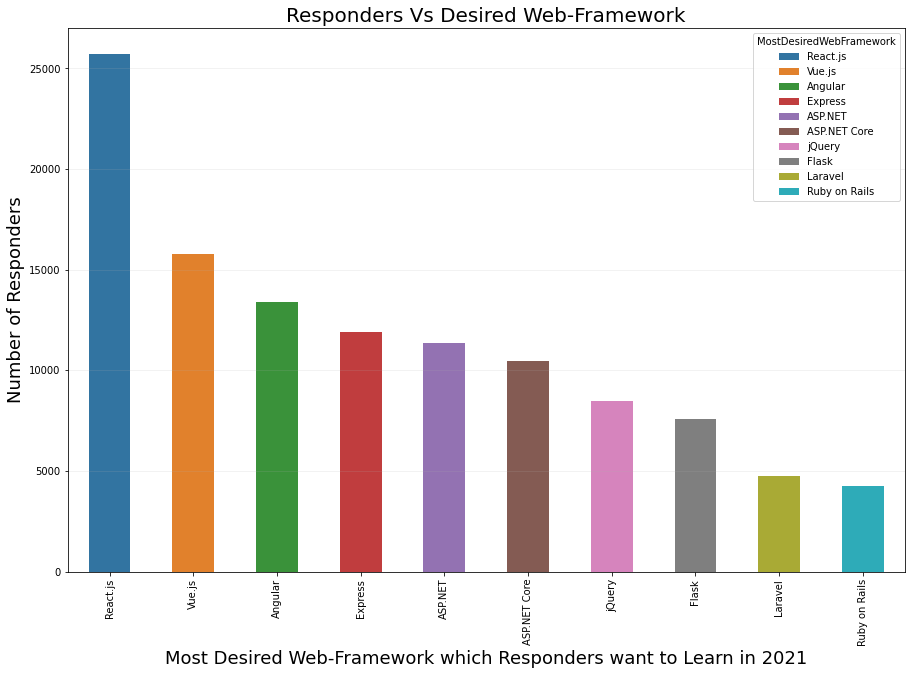

In [145]:
dataframe_plot = df_desired_Webframe
plot_xaxis = "MostDesiredWebFramework"
plot_yaxis = "ResponseId"
plot_category = "MostDesiredWebFramework"
plot_xlabel = 'Most Desired Web-Framework which Responders want to Learn in 2021'
plot_ylabel = 'Number of Responders'
plot_title = 'Responders Vs Desired Web-Framework'
width = 15
height = 10
plot_desired_tech(dataframe_plot, 
                  plot_xaxis, 
                  plot_yaxis, 
                  plot_category, 
                  plot_xlabel,
                  plot_ylabel, 
                  plot_title,width, height)

#### Most desired Miscellaneous Tech Developers want to work

In [146]:
column_list=['ResponseId','MiscTechWantToWorkWith']
df_desired_MiscTech=dataset[column_list]
df_desired_MiscTech=df_desired_MiscTech.dropna()
df_desired_MiscTech

,ResponseId,MiscTechWantToWorkWith
2,3,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch
4,5,Hadoop;NumPy;Pandas
5,6,Keras;NumPy;Pandas;Qt;React Native;TensorFlow;...
9,10,Keras;NumPy;TensorFlow;Torch/PyTorch
10,11,.NET Core / .NET 5
...,...,...
83429,83430,.NET Framework;.NET Core / .NET 5;NumPy;Pandas
83431,83432,Flutter;Hadoop;NumPy;TensorFlow;Torch/PyTorch
83433,83434,Flutter
83436,83437,Apache Spark;Hadoop;Keras;NumPy;Pandas;TensorFlow


In [147]:
df_desired_MiscTech.MiscTechWantToWorkWith.unique()
df_desired_MiscTech.MiscTechWantToWorkWith.astype(str)

2              Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch
4                                      Hadoop;NumPy;Pandas
5        Keras;NumPy;Pandas;Qt;React Native;TensorFlow;...
9                     Keras;NumPy;TensorFlow;Torch/PyTorch
10                                      .NET Core / .NET 5
                               ...                        
83429       .NET Framework;.NET Core / .NET 5;NumPy;Pandas
83431        Flutter;Hadoop;NumPy;TensorFlow;Torch/PyTorch
83433                                              Flutter
83436    Apache Spark;Hadoop;Keras;NumPy;Pandas;TensorFlow
83437                NumPy;Pandas;TensorFlow;Torch/PyTorch
Name: MiscTechWantToWorkWith, Length: 38021, dtype: object

In [148]:
def miscTech(df_desired_MiscTech, miscTech_name):
    if miscTech_name in df_desired_MiscTech['MiscTechWantToWorkWith']:
      return 1
    else:
      return 0
    return 0

In [149]:
df_desired_MiscTech.MiscTechWantToWorkWith.unique()

array(['Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch',
       'Hadoop;NumPy;Pandas',
       'Keras;NumPy;Pandas;Qt;React Native;TensorFlow;Torch/PyTorch', ...,
       'Apache Spark;Hadoop;NumPy;React Native',
       '.NET Framework;.NET Core / .NET 5;Hadoop;NumPy;Qt',
       'Apache Spark;Hadoop;NumPy;Qt'], dtype=object)

In [150]:
df_desired_MiscTech['Keras']=df_desired_MiscTech.apply(miscTech,miscTech_name='Keras',axis=1)
df_desired_MiscTech['NumPy']=df_desired_MiscTech.apply(miscTech,miscTech_name='NumPy',axis=1)
df_desired_MiscTech['Pandas']=df_desired_MiscTech.apply(miscTech,miscTech_name='Pandas',axis=1)
df_desired_MiscTech['TensorFlow']=df_desired_MiscTech.apply(miscTech,miscTech_name='TensorFlow',axis=1)
df_desired_MiscTech['Torch/PyTorch']=df_desired_MiscTech.apply(miscTech,miscTech_name='Torch/PyTorch',axis=1)
df_desired_MiscTech['Hadoop']=df_desired_MiscTech.apply(miscTech,miscTech_name='Hadoop',axis=1)
df_desired_MiscTech['Qt']=df_desired_MiscTech.apply(miscTech,miscTech_name='Qt',axis=1)
df_desired_MiscTech['React Native']=df_desired_MiscTech.apply(miscTech,miscTech_name='React Native',axis=1)
df_desired_MiscTech['.NET Framework']=df_desired_MiscTech.apply(miscTech,miscTech_name='.NET Framework',axis=1)
df_desired_MiscTech['.NET Core / .NET 5']=df_desired_MiscTech.apply(miscTech,miscTech_name='.NET Core / .NET 5',axis=1)
df_desired_MiscTech['Apache Spark']=df_desired_MiscTech.apply(miscTech,miscTech_name='Apache Spark',axis=1)
df_desired_MiscTech

,ResponseId,MiscTechWantToWorkWith,Keras,NumPy,Pandas,TensorFlow,Torch/PyTorch,Hadoop,Qt,React Native,.NET Framework,.NET Core / .NET 5,Apache Spark
2,3,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,1,1,1,1,1,0,0,0,0,0,0
4,5,Hadoop;NumPy;Pandas,0,1,1,0,0,1,0,0,0,0,0
5,6,Keras;NumPy;Pandas;Qt;React Native;TensorFlow;...,1,1,1,1,1,0,1,1,0,0,0
9,10,Keras;NumPy;TensorFlow;Torch/PyTorch,1,1,0,1,1,0,0,0,0,0,0
10,11,.NET Core / .NET 5,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83429,83430,.NET Framework;.NET Core / .NET 5;NumPy;Pandas,0,1,1,0,0,0,0,0,1,1,0
83431,83432,Flutter;Hadoop;NumPy;TensorFlow;Torch/PyTorch,0,1,0,1,1,1,0,0,0,0,0
83433,83434,Flutter,0,0,0,0,0,0,0,0,0,0,0
83436,83437,Apache Spark;Hadoop;Keras;NumPy;Pandas;TensorFlow,1,1,1,1,0,1,0,0,0,0,1


In [151]:
df_desired_MiscTech_subset=df_desired_MiscTech.iloc[:,2:]
df_desired_MiscTech_subset

,Keras,NumPy,Pandas,TensorFlow,Torch/PyTorch,Hadoop,Qt,React Native,.NET Framework,.NET Core / .NET 5,Apache Spark
2,1,1,1,1,1,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0
5,1,1,1,1,1,0,1,1,0,0,0
9,1,1,0,1,1,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
83429,0,1,1,0,0,0,0,0,1,1,0
83431,0,1,0,1,1,1,0,0,0,0,0
83433,0,0,0,0,0,0,0,0,0,0,0
83436,1,1,1,1,0,1,0,0,0,0,1


In [152]:
df_desired_MiscTech_collated=df_desired_MiscTech_subset.sum()
df_desired_MiscTech=pd.DataFrame(df_desired_MiscTech_collated)
df_desired_MiscTech.reset_index(inplace=True)
df_desired_MiscTech.columns=['MostDesiredMisctech','ResponseId']
df_desired_MiscTech=df_desired_MiscTech.sort_values(by='ResponseId',ascending=False)
df_desired_MiscTech

,MostDesiredMisctech,ResponseId
9,.NET Core / .NET 5,13630
1,NumPy,12773
3,TensorFlow,11879
2,Pandas,10863
7,React Native,8621
4,Torch/PyTorch,7977
8,.NET Framework,7761
0,Keras,5190
6,Qt,3478
10,Apache Spark,3453


In [153]:
df_desired_MiscTech=df_desired_MiscTech.head(10)
df_desired_MiscTech

,MostDesiredMisctech,ResponseId
9,.NET Core / .NET 5,13630
1,NumPy,12773
3,TensorFlow,11879
2,Pandas,10863
7,React Native,8621
4,Torch/PyTorch,7977
8,.NET Framework,7761
0,Keras,5190
6,Qt,3478
10,Apache Spark,3453


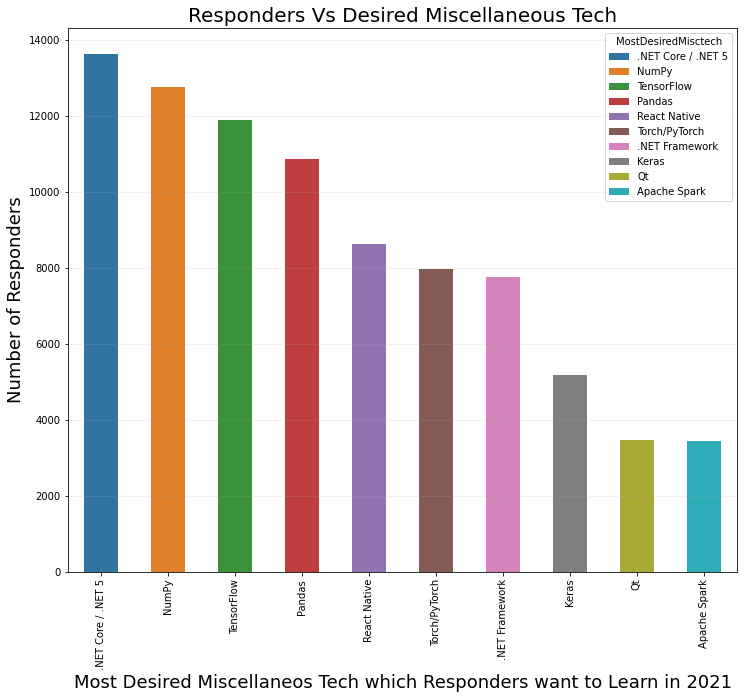

In [154]:
dataframe_plot = df_desired_MiscTech
plot_xaxis = "MostDesiredMisctech"
plot_yaxis = "ResponseId"
plot_category = "MostDesiredMisctech"
plot_xlabel = 'Most Desired Miscellaneos Tech which Responders want to Learn in 2021'
plot_ylabel = 'Number of Responders'
plot_title = 'Responders Vs Desired Miscellaneous Tech'
width = 12
height = 10
plot_desired_tech(dataframe_plot, 
                  plot_xaxis, 
                  plot_yaxis, 
                  plot_category, 
                  plot_xlabel,
                  plot_ylabel, 
                  plot_title,width,height)


#### Most desired Tools Tech Developers want to work

In [155]:
column_list=['ResponseId','ToolsTechWantToWorkWith']
df_desired_ToolsTech=dataset[column_list]
df_desired_ToolsTech=df_desired_ToolsTech.dropna()
df_desired_ToolsTech

,ResponseId,ToolsTechWantToWorkWith
1,2,Git
4,5,Docker;Git;Kubernetes;Yarn
5,6,Docker;Git;Unity 3D;Unreal Engine
8,9,Docker;Git;Kubernetes
9,10,Git
...,...,...
83434,83435,Git;Kubernetes
83435,83436,Docker;Git;Kubernetes
83436,83437,Docker;Git;Kubernetes;Terraform
83437,83438,Kubernetes;Terraform


In [156]:
df_desired_ToolsTech.ToolsTechWantToWorkWith.unique()
df_desired_ToolsTech.ToolsTechWantToWorkWith.astype(str)

1                                      Git
4               Docker;Git;Kubernetes;Yarn
5        Docker;Git;Unity 3D;Unreal Engine
8                    Docker;Git;Kubernetes
9                                      Git
                       ...                
83434                       Git;Kubernetes
83435                Docker;Git;Kubernetes
83436      Docker;Git;Kubernetes;Terraform
83437                 Kubernetes;Terraform
83438                Docker;Git;Kubernetes
Name: ToolsTechWantToWorkWith, Length: 65480, dtype: object

In [157]:
def ToolsTech(df_desired_ToolsTech, ToolsTech_name):
    if ToolsTech_name in df_desired_ToolsTech['ToolsTechWantToWorkWith']:
      return 1
    else:
      return 0
    return 0

In [158]:
df_desired_ToolsTech.ToolsTechWantToWorkWith.unique()

array(['Git', 'Docker;Git;Kubernetes;Yarn',
       'Docker;Git;Unity 3D;Unreal Engine', ..., 'Pulumi;Unity 3D',
       'Ansible;Deno;Git;Pulumi',
       'Docker;Git;Pulumi;Terraform;Unity 3D;Yarn'], dtype=object)

In [159]:
df_desired_ToolsTech['Git']=df_desired_ToolsTech.apply(ToolsTech,ToolsTech_name='Git',axis=1)
df_desired_ToolsTech['Docker']=df_desired_ToolsTech.apply(ToolsTech,ToolsTech_name='Docker',axis=1)
df_desired_ToolsTech['Kubernetes']=df_desired_ToolsTech.apply(ToolsTech,ToolsTech_name='Kubernetes',axis=1)
df_desired_ToolsTech['Yarn']=df_desired_ToolsTech.apply(ToolsTech,ToolsTech_name='Yarn',axis=1)
df_desired_ToolsTech['Unity 3D']=df_desired_ToolsTech.apply(ToolsTech,ToolsTech_name='Unity 3D',axis=1)
df_desired_ToolsTech['Unreal Engine']=df_desired_ToolsTech.apply(ToolsTech,ToolsTech_name='Unreal Engine',axis=1)
df_desired_ToolsTech['Pulumi']=df_desired_ToolsTech.apply(ToolsTech,ToolsTech_name='Pulumi',axis=1)
df_desired_ToolsTech['Ansible']=df_desired_ToolsTech.apply(ToolsTech,ToolsTech_name='Ansible',axis=1)
df_desired_ToolsTech['Deno']=df_desired_ToolsTech.apply(ToolsTech,ToolsTech_name='Deno',axis=1)
df_desired_ToolsTech['Terraform']=df_desired_ToolsTech.apply(ToolsTech,ToolsTech_name='Terraform',axis=1)
df_desired_ToolsTech

,ResponseId,ToolsTechWantToWorkWith,Git,Docker,Kubernetes,Yarn,Unity 3D,Unreal Engine,Pulumi,Ansible,Deno,Terraform
1,2,Git,1,0,0,0,0,0,0,0,0,0
4,5,Docker;Git;Kubernetes;Yarn,1,1,1,1,0,0,0,0,0,0
5,6,Docker;Git;Unity 3D;Unreal Engine,1,1,0,0,1,1,0,0,0,0
8,9,Docker;Git;Kubernetes,1,1,1,0,0,0,0,0,0,0
9,10,Git,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,Git;Kubernetes,1,0,1,0,0,0,0,0,0,0
83435,83436,Docker;Git;Kubernetes,1,1,1,0,0,0,0,0,0,0
83436,83437,Docker;Git;Kubernetes;Terraform,1,1,1,0,0,0,0,0,0,1
83437,83438,Kubernetes;Terraform,0,0,1,0,0,0,0,0,0,1


In [160]:
df_desired_ToolsTech_subset=df_desired_ToolsTech.iloc[:,2:]
df_desired_ToolsTech_subset

,Git,Docker,Kubernetes,Yarn,Unity 3D,Unreal Engine,Pulumi,Ansible,Deno,Terraform
1,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,0
5,1,1,0,0,1,1,0,0,0,0
8,1,1,1,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
83434,1,0,1,0,0,0,0,0,0,0
83435,1,1,1,0,0,0,0,0,0,0
83436,1,1,1,0,0,0,0,0,0,1
83437,0,0,1,0,0,0,0,0,0,1


In [161]:
df_desired_ToolsTech_collated=df_desired_ToolsTech_subset.sum()
df_desired_ToolsTech=pd.DataFrame(df_desired_ToolsTech_collated)
df_desired_ToolsTech.reset_index(inplace=True)
df_desired_ToolsTech.columns=['MostDesiredToolsTech','ResponseId']
df_desired_ToolsTech=df_desired_ToolsTech.sort_values(by='ResponseId',ascending=False)
df_desired_ToolsTech

,MostDesiredToolsTech,ResponseId
0,Git,58308
1,Docker,37870
2,Kubernetes,21977
3,Yarn,9936
4,Unity 3D,8285
9,Terraform,7756
7,Ansible,5876
5,Unreal Engine,5563
8,Deno,4773
6,Pulumi,901


In [162]:
df_desired_ToolsTech=df_desired_ToolsTech.head(10)
df_desired_ToolsTech

,MostDesiredToolsTech,ResponseId
0,Git,58308
1,Docker,37870
2,Kubernetes,21977
3,Yarn,9936
4,Unity 3D,8285
9,Terraform,7756
7,Ansible,5876
5,Unreal Engine,5563
8,Deno,4773
6,Pulumi,901


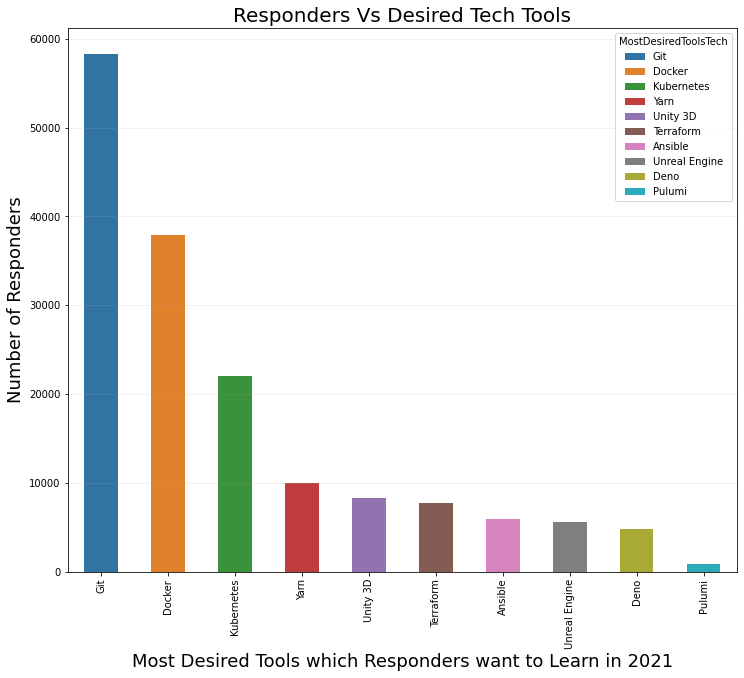

In [163]:
dataframe_plot = df_desired_ToolsTech
plot_xaxis = "MostDesiredToolsTech"
plot_yaxis = "ResponseId"
plot_category = "MostDesiredToolsTech"
plot_xlabel = 'Most Desired Tools which Responders want to Learn in 2021'
plot_ylabel = 'Number of Responders'
plot_title = 'Responders Vs Desired Tech Tools'
width = 12
height = 10
plot_desired_tech(dataframe_plot, 
                  plot_xaxis, 
                  plot_yaxis, 
                  plot_category, 
                  plot_xlabel,
                  plot_ylabel, 
                  plot_title,width,height)
